## **1. Import libraries**

### a. Restart session installs

In [ ]:
!pip install --upgrade --force-reinstall \
    numpy==1.26.4 \
    pandas==2.1.3 \
    matplotlib==3.8.4 \
    seaborn==0.13.2 \
    statsmodels==0.14.1 \
    scipy==1.12.0 \
    pmdarima==2.0.3 \
    scikit-learn==1.3.2 \
    tensorflow==2.15.0 \
    openpyxl==3.1.2 \
    xlrd==2.0.1 \
    sktime==0.25.0

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached matplotlib-3.8.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached statsmodels-0.14.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.5 kB)
  Using cached scipy-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached pmdarima-2.0.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
  Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached openpyxl-3.1.2-py2.py3-none-any.whl.met

### b. Non-restart

In [ ]:
!pip install --upgrade sktime scikit-base

  Using cached sktime-0.38.4-py3-none-any.whl.metadata (35 kB)
Using cached sktime-0.38.4-py3-none-any.whl (35.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.7/145.7 kB 899.1 kB/s eta 0:00:00
  Attempting uninstall: scikit-base
    Found existing installation: scikit-base 0.6.2
    Uninstalling scikit-base-0.6.2:
      Successfully uninstalled scikit-base-0.6.2
  Attempting uninstall: sktime
    Found existing installation: sktime 0.25.0
    Uninstalling sktime-0.25.0:
      Successfully uninstalled sktime-0.25.0


In [ ]:
!pip install --upgrade dask==2024.7.1 #2025.2.1

In [ ]:
!pip install keras-tuner --upgrade

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import pmdarima as pm
import tensorflow as tf
import sktime
from sktime.forecasting.arima import AutoARIMA
from datetime import datetime, timedelta
from matplotlib.patches import Rectangle
import matplotlib.animation as animation
from matplotlib import animation
from matplotlib import rc
import statsmodels.graphics.api as smgraphics
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL, seasonal_decompose
from scipy.stats import boxcox
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sktime.forecasting.compose import (TransformedTargetForecaster, make_reduction)
from sktime.forecasting.model_selection import (ExpandingWindowSplitter, ForecastingGridSearchCV)
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from keras.models import Sequential
import gdown
from pmdarima.arima import auto_arima
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import warnings
from sklearn.model_selection import TimeSeriesSplit
from itertools import product
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import MinMaxScaler

# Suppress all warnings.
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10, 5)

/usr/local/lib/python3.11/dist-packages/pmdarima/compat/sklearn.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version
/usr/lib/python3.11/importlib/__init__.py:126: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  return _bootstrap._gcd_import(name[level:], package, level)


## **2. Load files and create dataframes**

### a. Download files

In [ ]:
# ISBN: https://docs.google.com/spreadsheets/d/1WnjfO_kRaqncHVP3azjLh9Ac0qC4M1z_/edit?usp=sharing&ouid=112747283999061043783&rtpof=true&sd=true
# UK Weekly Trended: https://docs.google.com/spreadsheets/d/1AQGcjnLv693FeD_639TDcVvpVTPvBO_F/edit?usp=sharing&ouid=112747283999061043783&rtpof=true&sd=true

In [ ]:
# Load ISBN file
!gdown --id 1WnjfO_kRaqncHVP3azjLh9Ac0qC4M1z_

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1WnjfO_kRaqncHVP3azjLh9Ac0qC4M1z_
To: /content/ISBN List.xlsx
100% 56.0k/56.0k [00:00<00:00, 50.9MB/s]


In [ ]:
# Load Weekly Trended file
!gdown --id 1AQGcjnLv693FeD_639TDcVvpVTPvBO_F

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1AQGcjnLv693FeD_639TDcVvpVTPvBO_F
To: /content/UK Weekly Trended Timeline from 200101_202429.xlsx
100% 15.7M/15.7M [00:00<00:00, 64.2MB/s]


### b. Load to DataFrames

In [ ]:
# Weekly Trended DataFrame
data_dictionary_UK = pd.read_excel('UK Weekly Trended Timeline from 200101_202429.xlsx', sheet_name=None)

In [ ]:
print(data_dictionary_UK.keys())

dict_keys(['F Adult Fiction', 'S Adult Non-Fiction Specialist', 'T Adult Non-Fiction Trade', "Y Children's, YA & Educational"])


In [ ]:
# ISBN DataFrame
data_dictionary_ISBN=pd.read_excel('ISBN List.xlsx', sheet_name=None)

In [ ]:
print(data_dictionary_ISBN.keys())

dict_keys(['F - Adult Fiction', 'S Adult Non-Fiction Specialist', 'T Adult Non-Fiction Trade', "Y Children's, YA & Educational"])


### c. Combine sheets into single DataFrame

In [ ]:
# Combine all sheets in data_dictionary_UK  into a single DataFrame with an extra column to identify the sheet
df_UK_weekly = pd.concat(
    [df.assign(Category=sheet_name) for sheet_name, df in data_dictionary_UK.items()],
    ignore_index=True
)

In [ ]:
df_UK_weekly.head()

ISBN            Title         Author  Interval   End Date  Volume  \
0  9780002261821  One For My Baby  Parsons, Tony    200513 2005-04-02       1   
1  9780002261821  One For My Baby  Parsons, Tony    200503 2005-01-22       1   
2  9780002261821  One For My Baby  Parsons, Tony    200422 2004-05-29       1   
3  9780002261821  One For My Baby  Parsons, Tony    200415 2004-04-10       2   
4  9780002261821  One For My Baby  Parsons, Tony    200404 2004-01-24       2   

   Value    ASP    RRP   Binding                   Imprint    Publisher Group  \
0  15.99  15.99  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
1  15.99  15.99  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
2  11.19  11.19  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
3  27.18  13.59  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
4  22.48  11.24  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   

                     Product Class         Category  
0  F1.1 General & Literary Fiction  F Adult Fiction  
1  F1.1 General & Literary Fiction  F Adult Fiction  
2  F1.1 General & Literary Fiction  F Adult Fiction  
3  F1.1 General & Literary Fiction  F Adult Fiction  
4  F1.1 General & Literary Fiction  F Adult Fiction

In [ ]:
# Combine all sheets in Weekly Trended  into a single DataFrame with an extra column to identify the sheet
df_ISBN = pd.concat(
    [df.assign(Category=sheet_name) for sheet_name, df in data_dictionary_ISBN.items()],
    ignore_index=True
)

In [ ]:
df_ISBN.head()

ISBN                                              Title  \
0  9780330375252                Bridget Jones's Diary (Film Tie-in)   
1  9780140276336                                        White Teeth   
2  9780006512134                                        Man and Boy   
3  9780099280255                                       Brethren,The   
4  9780552998727  Marrying The Mistress:an irresistible and grip...   

             Author                   Imprint    Publisher Group    RRP  \
0   Fielding, Helen                   Picador  Pan Macmillan Grp   8.99   
1      Smith, Zadie         Penguin Books Ltd        Penguin Grp   9.99   
2     Parsons, Tony  HarperCollins Publishers  HarperCollins Grp   8.99   
3     Grisham, John               Arrow Books   Random House Grp   6.99   
4  Trollope, Joanna                Black Swan     Transworld Grp  10.99   

     Binding Publication Date                     Product Class  \
0  Paperback       2001-03-23   F1.1 General & Literary Fiction   
1  Paperback       2001-01-25   F1.1 General & Literary Fiction   
2  Paperback       2000-03-06   F1.1 General & Literary Fiction   
3  Paperback       2000-12-27  F2.1 Crime, Thriller & Adventure   
4  Paperback       2001-02-01   F1.1 General & Literary Fiction   

  Country of Publication           Category  
0         United Kingdom  F - Adult Fiction  
1         United Kingdom  F - Adult Fiction  
2         United Kingdom  F - Adult Fiction  
3         United Kingdom  F - Adult Fiction  
4         United Kingdom  F - Adult Fiction

## **3. Preprocess data**

In [ ]:
#replace spaces with underscores across all column names
df_UK_weekly.columns = df_UK_weekly.columns.str.replace(' ', '_')
df_ISBN.columns = df_ISBN.columns.str.replace(' ', '_')

In [ ]:
# Convert ISBN to string
df_UK_weekly['ISBN'] = df_UK_weekly['ISBN'].astype(str)
df_ISBN['ISBN'] = df_ISBN['ISBN'].astype(str)

In [ ]:
df_UK_weekly.head()

ISBN            Title         Author  Interval   End_Date  Volume  \
0  9780002261821  One For My Baby  Parsons, Tony    200513 2005-04-02       1   
1  9780002261821  One For My Baby  Parsons, Tony    200503 2005-01-22       1   
2  9780002261821  One For My Baby  Parsons, Tony    200422 2004-05-29       1   
3  9780002261821  One For My Baby  Parsons, Tony    200415 2004-04-10       2   
4  9780002261821  One For My Baby  Parsons, Tony    200404 2004-01-24       2   

   Value    ASP    RRP   Binding                   Imprint    Publisher_Group  \
0  15.99  15.99  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
1  15.99  15.99  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
2  11.19  11.19  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
3  27.18  13.59  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
4  22.48  11.24  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   

                     Product_Class         Category  
0  F1.1 General & Literary Fiction  F Adult Fiction  
1  F1.1 General & Literary Fiction  F Adult Fiction  
2  F1.1 General & Literary Fiction  F Adult Fiction  
3  F1.1 General & Literary Fiction  F Adult Fiction  
4  F1.1 General & Literary Fiction  F Adult Fiction

In [ ]:
df_ISBN.head()

ISBN                                              Title  \
0  9780330375252                Bridget Jones's Diary (Film Tie-in)   
1  9780140276336                                        White Teeth   
2  9780006512134                                        Man and Boy   
3  9780099280255                                       Brethren,The   
4  9780552998727  Marrying The Mistress:an irresistible and grip...   

             Author                   Imprint    Publisher_Group    RRP  \
0   Fielding, Helen                   Picador  Pan Macmillan Grp   8.99   
1      Smith, Zadie         Penguin Books Ltd        Penguin Grp   9.99   
2     Parsons, Tony  HarperCollins Publishers  HarperCollins Grp   8.99   
3     Grisham, John               Arrow Books   Random House Grp   6.99   
4  Trollope, Joanna                Black Swan     Transworld Grp  10.99   

     Binding Publication_Date                     Product_Class  \
0  Paperback       2001-03-23   F1.1 General & Literary Fiction   
1  Paperback       2001-01-25   F1.1 General & Literary Fiction   
2  Paperback       2000-03-06   F1.1 General & Literary Fiction   
3  Paperback       2000-12-27  F2.1 Crime, Thriller & Adventure   
4  Paperback       2001-02-01   F1.1 General & Literary Fiction   

  Country_of_Publication           Category  
0         United Kingdom  F - Adult Fiction  
1         United Kingdom  F - Adult Fiction  
2         United Kingdom  F - Adult Fiction  
3         United Kingdom  F - Adult Fiction  
4         United Kingdom  F - Adult Fiction

In [ ]:
# Ensure End Date is datetime and set as index
df_UK_weekly['End_Date'] = pd.to_datetime(df_UK_weekly['End_Date'])

In [ ]:
# Set 'End_Date' as the index and resample by week, filling missing weeks with 0
df_UK_weekly.set_index('End_Date', inplace=True)

In [ ]:
# Resample by week (W), sum the data, and fill missing values with 0, modifying the original dataframe
df_UK_weekly.resample('W').sum().fillna(0, inplace=True)

## **4. Initial data investigation**

### a. Filter out data beyond 2024-07-01

In [ ]:
# Filter df_UK_weekly for records with sales data beyond 2024-07-01
df_UK_weekly_filtered = df_UK_weekly[df_UK_weekly.index > '2024-07-01']

In [ ]:
df_UK_weekly_filtered.head()

ISBN              Title         Author  Interval  Volume  \
End_Date                                                                        
2024-07-13  9780006512134        Man and Boy  Parsons, Tony    202428       6   
2024-07-06  9780006512134        Man and Boy  Parsons, Tony    202427       1   
2024-07-20  9780006514091  Glass Palace, The  Ghosh, Amitav    202429      11   
2024-07-13  9780006514091  Glass Palace, The  Ghosh, Amitav    202428      11   
2024-07-06  9780006514091  Glass Palace, The  Ghosh, Amitav    202427       8   

             Value     ASP   RRP    Binding                   Imprint  \
End_Date                                                                
2024-07-13   51.78  8.6300  8.99  Paperback  HarperCollins Publishers   
2024-07-06    8.27  8.2700  8.99  Paperback  HarperCollins Publishers   
2024-07-20  107.49  9.7718  9.99  Paperback  HarperCollins Publishers   
2024-07-13  108.29  9.8445  9.99  Paperback  HarperCollins Publishers   
2024-07-06   77.52  9.6900  9.99  Paperback  HarperCollins Publishers   

              Publisher_Group                    Product_Class  \
End_Date                                                         
2024-07-13  HarperCollins Grp  F1.1 General & Literary Fiction   
2024-07-06  HarperCollins Grp  F1.1 General & Literary Fiction   
2024-07-20  HarperCollins Grp  F1.1 General & Literary Fiction   
2024-07-13  HarperCollins Grp  F1.1 General & Literary Fiction   
2024-07-06  HarperCollins Grp  F1.1 General & Literary Fiction   

                   Category  
End_Date                     
2024-07-13  F Adult Fiction  
2024-07-06  F Adult Fiction  
2024-07-20  F Adult Fiction  
2024-07-13  F Adult Fiction  
2024-07-06  F Adult Fiction

In [ ]:
# Get the list of ISBNs that meet the condition
isbn_filtered = df_UK_weekly_filtered['ISBN'].unique()

In [ ]:
len(isbn_filtered )

61

In [ ]:
# Show the filtered ISBNs
print(isbn_filtered)

['9780006512134' '9780006514091' '9780006514213' '9780006550433'
 '9780007101887' '9780099244721' '9780099771517' '9780140276336'
 '9780140285215' '9780140295962' '9780261103252' '9780349112763'
 '9780349113609' '9780349114033' '9780552145053' '9780552145060'
 '9780552997348' '9780552998000' '9780552998444' '9780552998482'
 '9780552998727' '9780722532935' '9780747268161' '9780749397548'
 '9780099286387' '9780006531203' '9780091816971' '9780091867775'
 '9780099285823' '9780099286578' '9780099422587' '9780099428558'
 '9780140259506' '9780140275421' '9780140276619' '9780140281293'
 '9780140294231' '9780224060875' '9780330355667' '9780340696767'
 '9780340766057' '9780340786055' '9780552145954' '9780552997034'
 '9780593048153' '9780719559792' '9780749395698' '9781841150437'
 '9780006647553' '9780241003008' '9780440864141' '9780440864554'
 '9780744523232' '9780752844299' '9780752846576' '9781841460307'
 '9781841460406' '9781841461502' '9781841462301' '9781841462400'
 '9781841462509']


### b. Plot data

In [ ]:
# Create a plot grid (e.g., 8x8 grid for 64 slots, leaving some empty space for 61 ISBNs)
num_plots = len(isbn_filtered)
rows = (num_plots // 6) + (1 if num_plots % 6 != 0 else 0)  # Calculate number of rows needed
cols = 6  # 8 plots per row

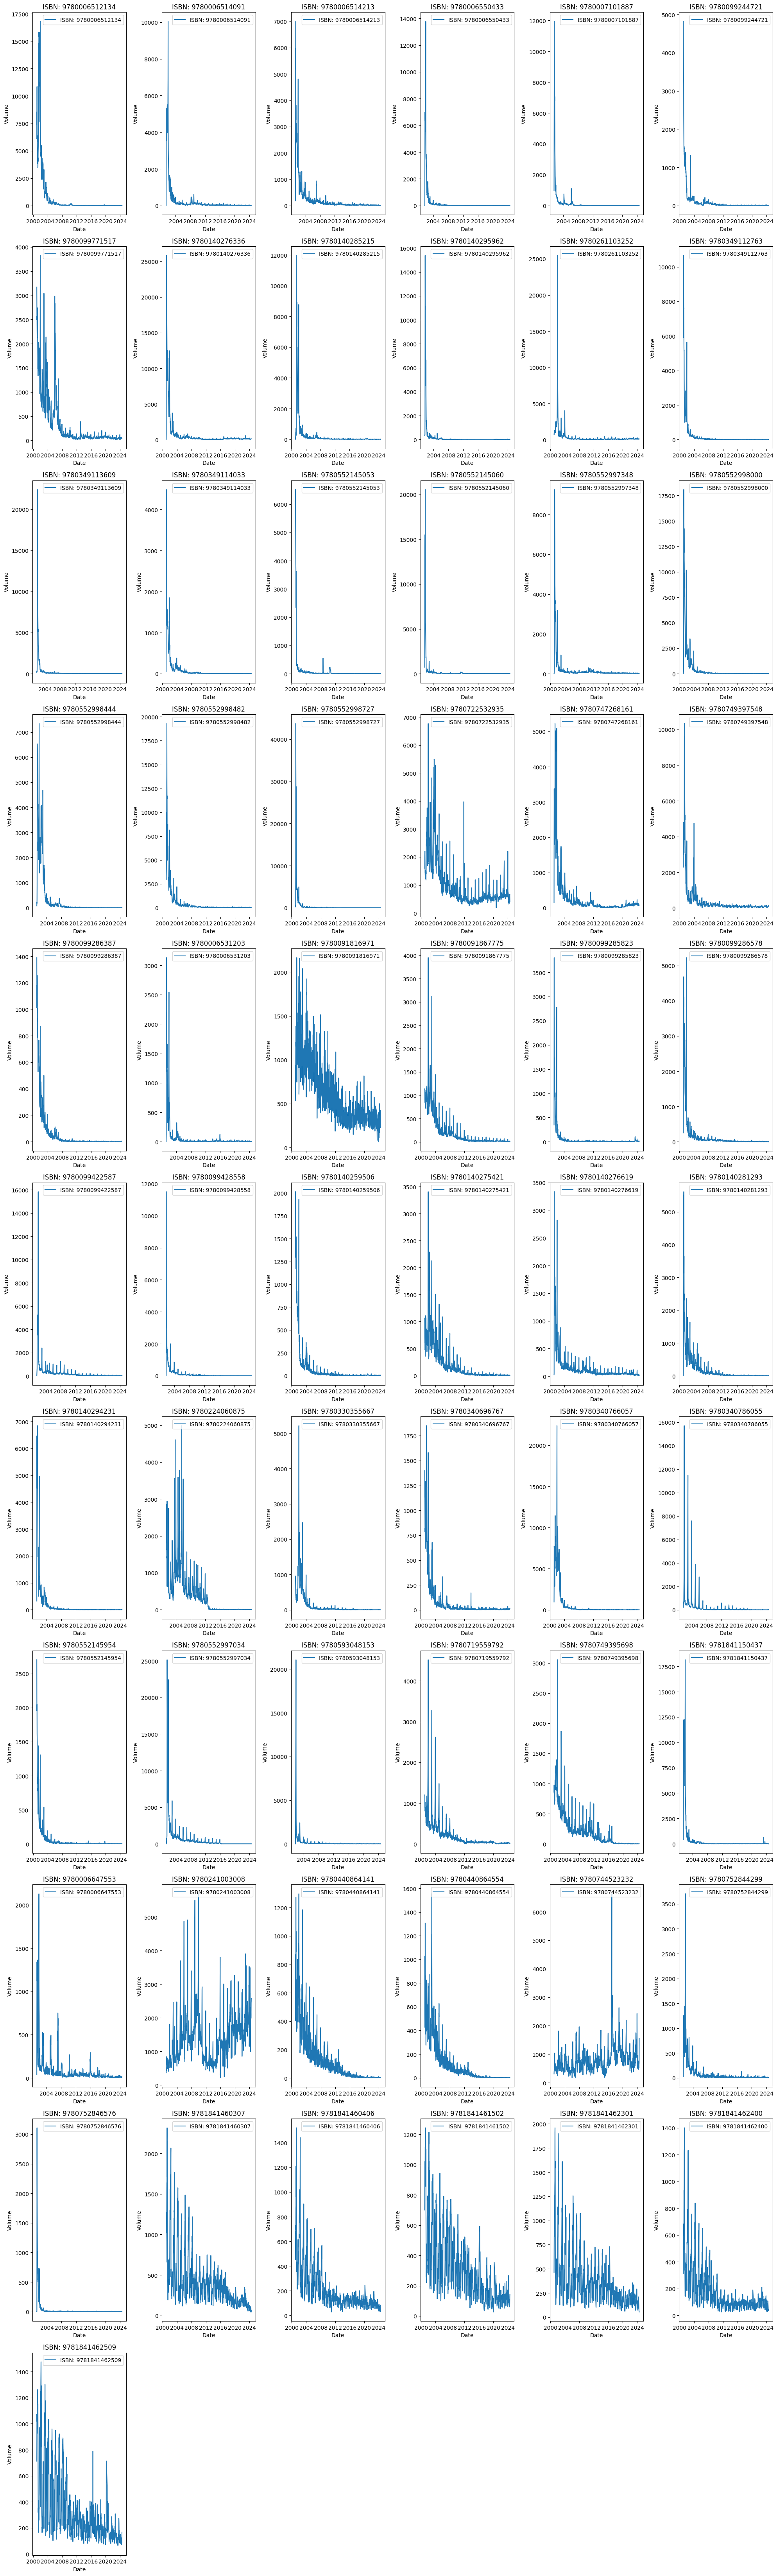

In [ ]:
# Create the figure and axes for subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 6 * rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each ISBN and plot the data from the original df_UK_weekly dataframe
for idx, isbn in enumerate(isbn_filtered):
    # Filter the original df_UK_weekly to get data for the current ISBN
    df_UK_weekly_isbn = df_UK_weekly[df_UK_weekly['ISBN'] == isbn]

    # Plot the data
    axes[idx].plot(df_UK_weekly_isbn.index, df_UK_weekly_isbn['Volume'], label=f'ISBN: {isbn}')
    axes[idx].set_title(f'ISBN: {isbn}')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Volume')
    axes[idx].legend()

# Remove unused subplots if there are any
for idx in range(num_plots, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout for better spacing
plt.tight_layout()

For the period from 2000-2012 most books gradually (or sharply for the less popular ones) decline in sales. From 2012 on, book sales seem to mostly stabilize.

But there are some exceptions, where sales don't have appeared to have started very strong, but have then risen and matinained stable sales through the years, with noticeable peaks.

The more popular books continue having seasonal peaks and are not flatlining across the years.

The less popular books have a good spike at the start and then appear to flatline, with some having very small peals (into 100s) in some consecutive years.

### d. Filter sales data for further analysis into two books (The Alchemist and The Very Hungry Caterpillar)

In [ ]:
# Filter data for further analysis
alchemist_isbns = df_ISBN[df_ISBN['Title'].str.contains('alchemist', case=False, na=False)]['ISBN'].astype(str).unique()
caterpillar_isbns = df_ISBN[df_ISBN['Title'].str.contains('caterpillar', case=False, na=False)]['ISBN'].astype(str).unique()

In [ ]:
print("The Alchemist ISBNs:")
print(alchemist_isbns)

print("\n The Very Hungry Caterpillar ISBNs:")
print(caterpillar_isbns)

The Alchemist ISBNs:
['9780722532935']

 The Very Hungry Caterpillar ISBNs:
['9780241003008' '9780140500875']


In [ ]:
# Apply the date filter to df_UK_weekly
df_UK_weekly_post2012 = df_UK_weekly[df_UK_weekly.index > '2012-01-01']

# For The Very Hungry Caterpillar ISBNs
for isbn in caterpillar_isbns:
    volume_caterpillar = df_UK_weekly_post2012[df_UK_weekly_post2012['ISBN'] == isbn]['Volume'].sum()
    print(f"Volume for ISBN {isbn} (The Very Hungry Caterpillar) after 2012-01-01: {volume_caterpillar}")

# For The Alchemist ISBNs
for isbn in alchemist_isbns:
    volume_alchemist = df_UK_weekly_post2012[df_UK_weekly_post2012['ISBN'] == isbn]['Volume'].sum()
    print(f"Volume for ISBN {isbn} (The Alchemist) after 2012-01-01: {volume_alchemist}")

Volume for ISBN 9780241003008 (The Very Hungry Caterpillar) after 2012-01-01: 883534
Volume for ISBN 9780140500875 (The Very Hungry Caterpillar) after 2012-01-01: 2
Volume for ISBN 9780722532935 (The Alchemist) after 2012-01-01: 345907


In [ ]:
# Directly filter df_UK_weekly_post2012 for the two ISBNs
df_UK_weekly_post2012 = df_UK_weekly_post2012[df_UK_weekly_post2012['ISBN'].isin(['9780241003008', '9780722532935'])]

In [ ]:
# Review output
df_UK_weekly_post2012.head()

ISBN           Title         Author  Interval  Volume  \
End_Date                                                                     
2024-07-20  9780722532935  Alchemist, The  Coelho, Paulo    202429     408   
2024-07-13  9780722532935  Alchemist, The  Coelho, Paulo    202428     510   
2024-07-06  9780722532935  Alchemist, The  Coelho, Paulo    202427     672   
2024-06-29  9780722532935  Alchemist, The  Coelho, Paulo    202426     627   
2024-06-22  9780722532935  Alchemist, The  Coelho, Paulo    202425     590   

              Value     ASP   RRP    Binding   Imprint    Publisher_Group  \
End_Date                                                                    
2024-07-20  3782.61  9.2711  9.99  Paperback  Thorsons  HarperCollins Grp   
2024-07-13  4638.63  9.0954  9.99  Paperback  Thorsons  HarperCollins Grp   
2024-07-06  5947.09  8.8498  9.99  Paperback  Thorsons  HarperCollins Grp   
2024-06-29  5530.58  8.8207  9.99  Paperback  Thorsons  HarperCollins Grp   
2024-06-22  5182.65  8.7842  9.99  Paperback  Thorsons  HarperCollins Grp   

                              Product_Class         Category  
End_Date                                                      
2024-07-20  F1.1 General & Literary Fiction  F Adult Fiction  
2024-07-13  F1.1 General & Literary Fiction  F Adult Fiction  
2024-07-06  F1.1 General & Literary Fiction  F Adult Fiction  
2024-06-29  F1.1 General & Literary Fiction  F Adult Fiction  
2024-06-22  F1.1 General & Literary Fiction  F Adult Fiction

In [ ]:
# View shape
df_UK_weekly_post2012.shape

(1256, 13)

In [ ]:
# sorting the titles to read 'The Alchemist' and 'The Very Hungry Caterpillar'
df_UK_weekly_post2012['Title'] = df_UK_weekly_post2012['Title'].str.replace(r'^(.*), The$', r'The \1', regex=True)

In [ ]:
# Confirm correctly filtered
df_UK_weekly_post2012['Title'].unique()

array(['The Alchemist', 'The Very Hungry Caterpillar'], dtype=object)

In [ ]:
# View null values
df_UK_weekly_post2012['Volume'].isna().sum()

0

In [ ]:
# Add epsilon for later modeling
epsilon = 1e-6

df_UK_weekly_post2012['Volume'] = df_UK_weekly_post2012['Volume'] + epsilon

The Very Hungry Caterpillar


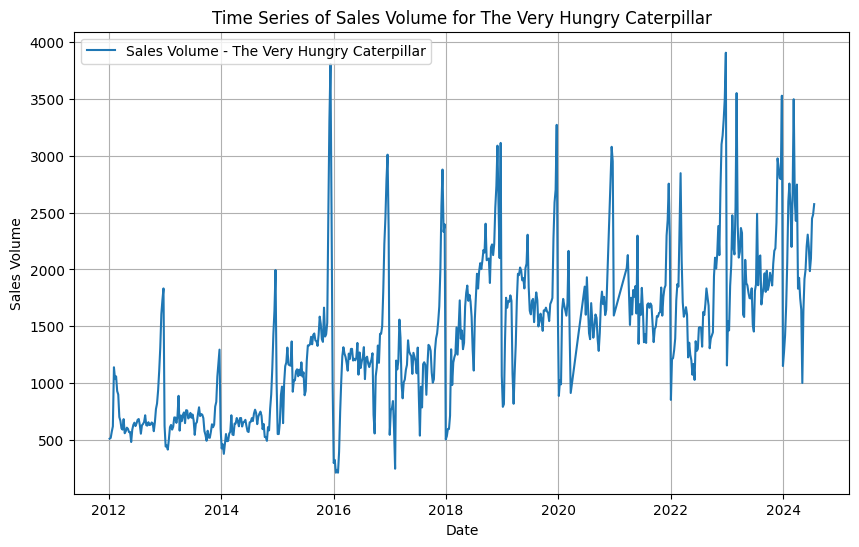

The Alchemist


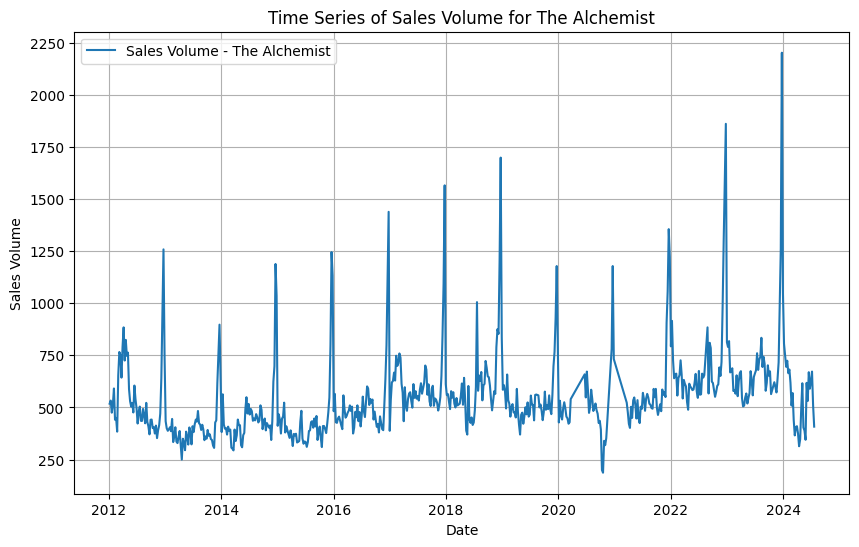

In [ ]:
# List of ISBNs to plot
isbns_to_plot = ['9780241003008', '9780722532935']

# Loop through the ISBNs and plot
for isbn in isbns_to_plot:
    # Filter the df_UK_weekly_post2012 by the ISBN
    book_data = df_UK_weekly_post2012[df_UK_weekly_post2012['ISBN'] == isbn]

    # Get the unique title(s) for the ISBN
    title = book_data['Title'].unique()[0]
    print(title)

    # Plot the Volume over Time
    plt.figure(figsize=(10, 6))
    plt.plot(book_data.index, book_data['Volume'], label=f'Sales Volume - {title}')
    plt.title(f'Time Series of Sales Volume for {title}')
    plt.xlabel('Date')
    plt.ylabel('Sales Volume')
    plt.grid(True)
    plt.legend()
    plt.show()

## **5. Classical techniques**

### a. Decomposition

In [ ]:
# Split into two series, one for each book
alch = df_UK_weekly_post2012[df_UK_weekly_post2012['Title'] == 'The Alchemist']
cat = df_UK_weekly_post2012[df_UK_weekly_post2012['Title'] == 'The Very Hungry Caterpillar']

In [ ]:
# Keep only End_Date and Volume
alch = alch[['Volume']]
cat = cat[['Volume']]

In [ ]:
alch = alch.sort_index()
cat = cat.sort_index()

The Alchemist has stable sales over time. With seasonal peaks, that grow throughout the years. The trend looks mostly flat with small increases. **For this book an additive decomposition model will be used**.

The Very Hungry Caterpillar has grown in sales volume over time. The seasonal spikes have also grown over time, which suggests that the seasonal variation increases with sales volume. **For this book a multiplicative decomposition model will be used**.

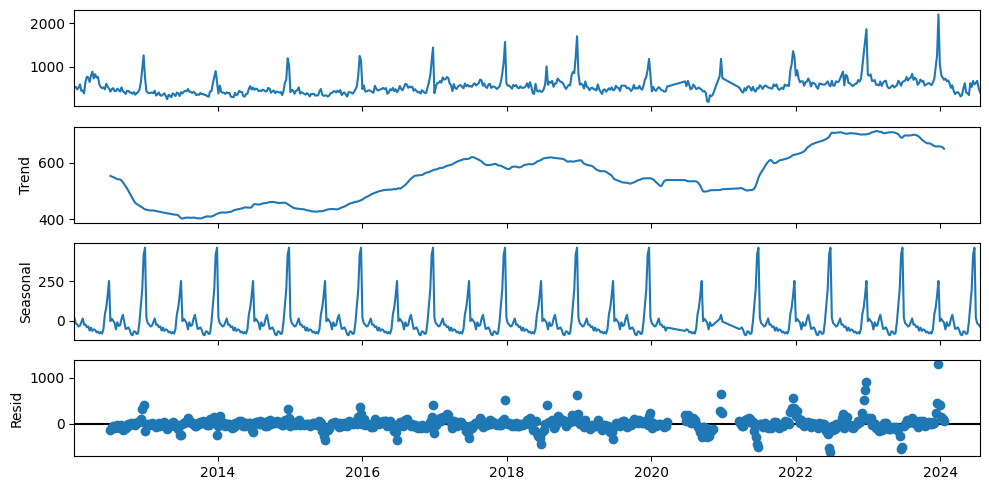

In [ ]:
# Fit STL on The Alchemist
decomp_alch = seasonal_decompose(alch, model='additive', period=52)  # 52 weeks per year
fig = decomp_alch.plot()
plt.show()

In [ ]:
# Save trend, seasonality and residuals, drop any NaNs addded during STL
seasonal_alch = decomp_alch.seasonal.dropna()
trend_alch = decomp_alch.trend.dropna()
residual_alch = decomp_alch.resid.dropna()

In [ ]:
residual_alch_clean = decomp_alch.resid.dropna()

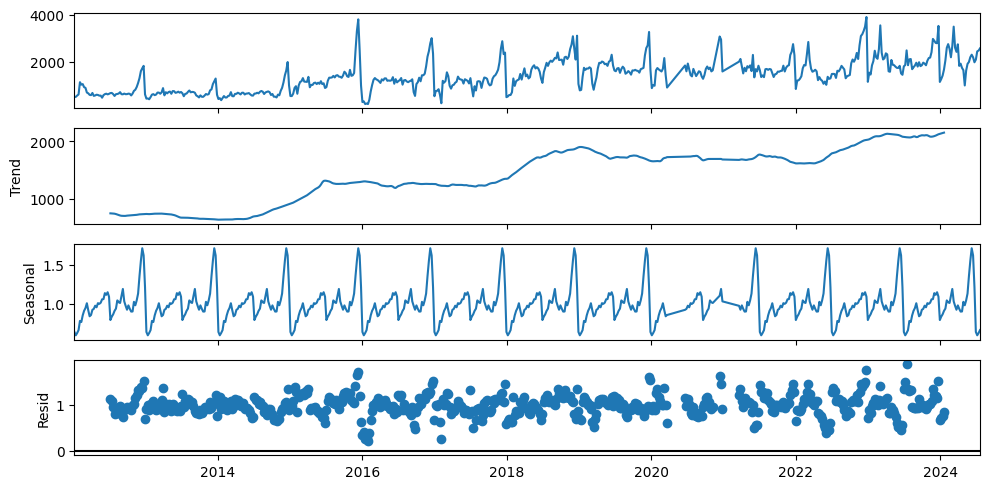

In [ ]:
# Fit STL on Caterpillar
decomp_cat = sm.tsa.seasonal_decompose(cat, model='multiplicative', period=52)
fig = decomp_cat.plot()
plt.show()

In [ ]:
# Save trend, seasonality and residuals
seasonal_cat = decomp_cat.seasonal
trend_cat = decomp_cat.trend
residual_cat = decomp_cat.resid

In [ ]:
# Drop NaNs added during decomposition
seasonal_cat = seasonal_cat.dropna()
trend_cat = trend_cat.dropna()
residual_cat = residual_cat.dropna()

### b. ACF & PACF - 'The Alchemist'

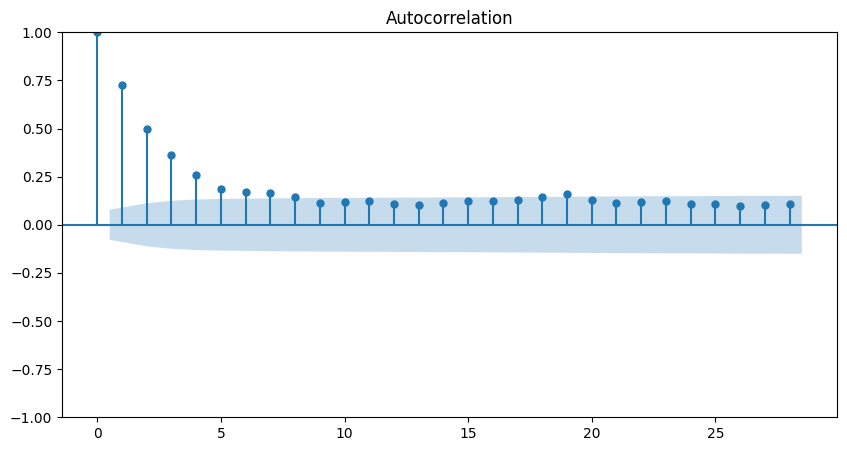

In [ ]:
# Create ACF plot for The Alchemist
smgraphics.tsa.plot_acf(alch);

# ACF default arguments.
# x                     : The time series object.
# lags=None             : Number of lags to calculate. If None selects automatically.
# alpha=0.05            : Confidence level to use for insignificance region.
# adjusted=False        : Related to calculation method.
# fft=False             : Related to calculation method (fast fourier transform).
# missing='none'        : How to treat missing values.
# zero=True             : Return 0-lag autocorrelation?
# bartlett_confint=True : Related to calculation of insignificance region.

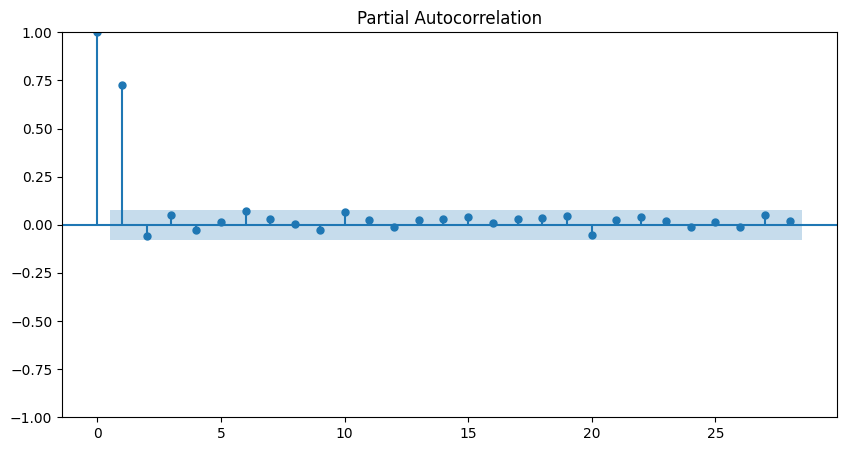

In [ ]:
# Create PACF plot for The Alchemist
smgraphics.tsa.plot_pacf(alch);

# PACF default arguments.
# x           : The time series object
# lags=None   : Number of lags to calculate. If None selects automatically
# alpha=0.05  : Confidence level to use for insignificance region
# method='ywm': Related to calculation method
# zero=True   : Return 0-lag autocorrelation?

The ACF plot for 'The Alchemist' shows a strong positive correlation at lag 1, which then declines gradually.

The PACF plot also shows the spike at lag 1, but with all subsequent ones being at or near zero.

These patterns sugges the series follows an AR(1) model, as each observation is primarily influenced by the immediately preceeding observation.

### c. ACF & PACF - 'The Very Hungry Caterpillar'

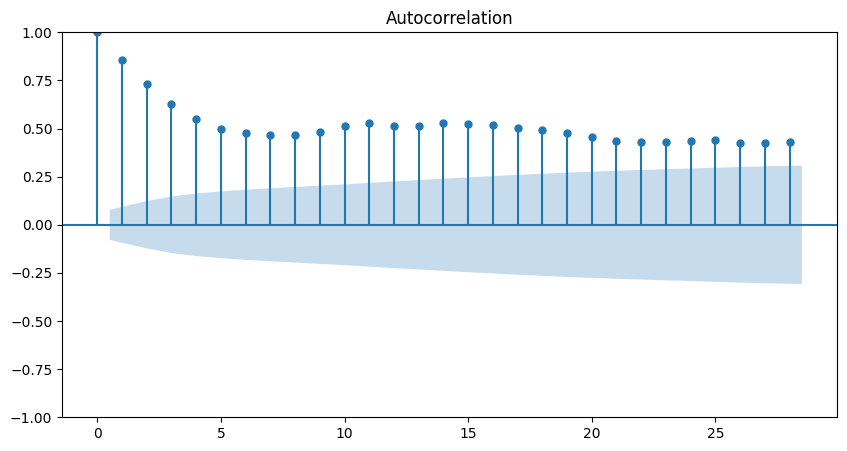

In [ ]:
# Create ACF plot for The Very Hungry Caterpillar
smgraphics.tsa.plot_acf(cat);

# ACF default arguments.
# x                     : The time series object.
# lags=None             : Number of lags to calculate. If None selects automatically.
# alpha=0.05            : Confidence level to use for insignificance region.
# adjusted=False        : Related to calculation method.
# fft=False             : Related to calculation method (fast fourier transform).
# missing='none'        : How to treat missing values.
# zero=True             : Return 0-lag autocorrelation?
# bartlett_confint=True : Related to calculation of insignificance region.

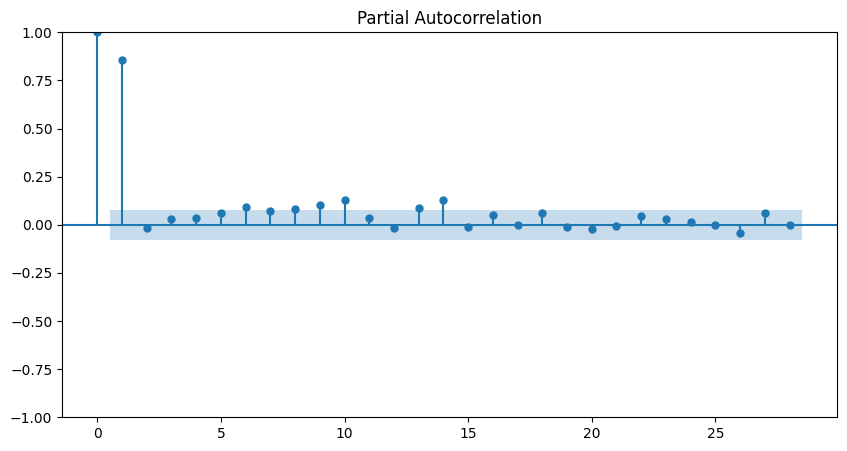

In [ ]:
# Create PACF plot for The Very Hungry Caterpillar
smgraphics.tsa.plot_pacf(cat);

# PACF default arguments.
# x           : The time series object
# lags=None   : Number of lags to calculate. If None selects automatically
# alpha=0.05  : Confidence level to use for insignificance region
# method='ywm': Related to calculation method
# zero=True   : Return 0-lag autocorrelation?

The ACF plot for 'The Very Hungry Caterpillar' has a strong positive correlation at lag 1, but instead of decaying the correlations remain high. The correlations stay above the confidence bands throughout most lags, which could suggest non-stationarity.

the PACF plot shows a very high spike at lag 1, but the others stay close to or within the confidence bands. This also suggests an AR(1) structure.

### d. Check for stationarity

In [ ]:
residual_cat = decomp_cat.resid

# Check for stationarity on Caterpillar
adf_result = adfuller(residual_cat.dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF Statistic: -8.706064787042436
p-value: 3.6975100198302853e-14


In [ ]:
print('Ljung-Box test output\n', acorr_ljungbox(residual_cat.dropna()), '...\n')

Ljung-Box test output
        lb_stat     lb_pvalue
1   223.688891  1.418313e-50
2   306.538882  2.728523e-67
3   334.328060  3.688960e-72
4   339.087191  3.980958e-72
5   339.093543  3.898587e-71
6   343.632500  3.591736e-71
7   354.898265  1.101682e-72
8   369.401469  6.513549e-75
9   379.285208  3.584608e-76
10  387.325222  4.681499e-77 ...



In [ ]:
residual_alch = decomp_alch.resid

# Check for stationarity on Alchemist
adf_result = adfuller(residual_alch.dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF Statistic: -11.700619815856136
p-value: 1.5719272094161374e-21


In [ ]:
print('Ljung-Box test output\n', acorr_ljungbox(residual_alch.dropna()), '...\n')

Ljung-Box test output
        lb_stat     lb_pvalue
1   218.763359  1.683177e-49
2   290.313501  9.103834e-64
3   318.860570  8.230063e-69
4   325.727193  3.045939e-69
5   326.043171  2.508109e-68
6   326.071002  2.105928e-67
7   326.138049  1.570518e-66
8   326.435002  9.631537e-66
9   328.804906  1.996385e-65
10  330.691148  4.957449e-65 ...



Both books are stationary, bu thave similar autocorrelation patterns. STL was not sufficient for either book and further AR modeling will be needed.

They have similar sales dynamics when we remove trend and seasonality. They seem to have strong week-to-week persistence.

### d. Auto ARIMA

The forecast horizon is the final 32 weeks of data. All prior data (from 2012-01-01 onwards) can be used as the training data.

Set reasonable bounds for Auto ARIMA's various parameters so that Auto ARIMA can identify the most suitable model.

In [ ]:
forecast_horizon = 32

# Split into training and testing data
# The Alchemist
alch_train = alch.iloc[:-forecast_horizon]
alch_test = alch.iloc[-forecast_horizon:]

# Caterpillar
cat_train = cat.iloc[:-forecast_horizon]
cat_test = cat.iloc[-forecast_horizon:]

In [ ]:
# Define the model and run for 'The Alchemist'
arima_model_alch = auto_arima(y=alch_train,
                         start_p=1, start_q=0, max_p=2, max_q=1,  # Smaller ranges
                         start_P=0, start_Q=0, max_P=1, max_Q=1,  # Smaller seasonal ranges
                         max_d=1, max_D=1,  # Limit differencing
                         m=52, seasonal=True,
                         stepwise=True,
                         approximation=True,  # Use approximation for speed
                         method='lbfgs',
                         maxiter=20,  # Reduce iterations
                         suppress_warnings=True)

print(arima_model_alch.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  596
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 52)   Log Likelihood               -3648.369
Date:                            Sun, 17 Aug 2025   AIC                           7304.737
Time:                                    16:24:07   BIC                           7322.292
Sample:                                         0   HQIC                          7311.573
                                            - 596                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2798      0.020    -14.229      0.000      -0.318      -0.241
ar.S.L52       0.7075      0.029   

In [ ]:
# Define the model and run for 'The Very Hungry Caterpillar'
arima_model_cat = auto_arima(y=cat_train,
                         start_p=1, start_q=0, max_p=2, max_q=1,  # Smaller ranges
                         start_P=0, start_Q=0, max_P=1, max_Q=1,  # Smaller seasonal ranges
                         max_d=1, max_D=1,  # Limit differencing
                         m=52, seasonal=True,
                         stepwise=True,
                         approximation=True,  # Use approximation for speed
                         method='lbfgs',
                         maxiter=20,  # Reduce iterations
                         suppress_warnings=True)

print(arima_model_cat.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  596
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 52)   Log Likelihood               -4213.363
Date:                             Sun, 17 Aug 2025   AIC                           8438.726
Time:                                     16:26:50   BIC                           8465.058
Sample:                                          0   HQIC                          8448.980
                                             - 596                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3184      0.810      0.393      0.694      -1.270       1.907
ar.L1          0.7357      

'The Very Hungry Caterpillar' has more complex data with AR(2)+MA(1) vs. just MA(1) for 'The Alchemist', and it also has a stronger year-over-year pattern.

Both models have pased Ljung-Box as the residuals now resemble white noise.

'The Alchemist' model fits better with a lower AIC (7304 vs. 8438).

### e. Find residuals of the best model for both books

In [ ]:
# Residuals for The Alchemist
residuals_alch = arima_model_alch.resid()

# Residuals for The Very Hungry Caterpillar
residuals_cat = arima_model_cat.resid()

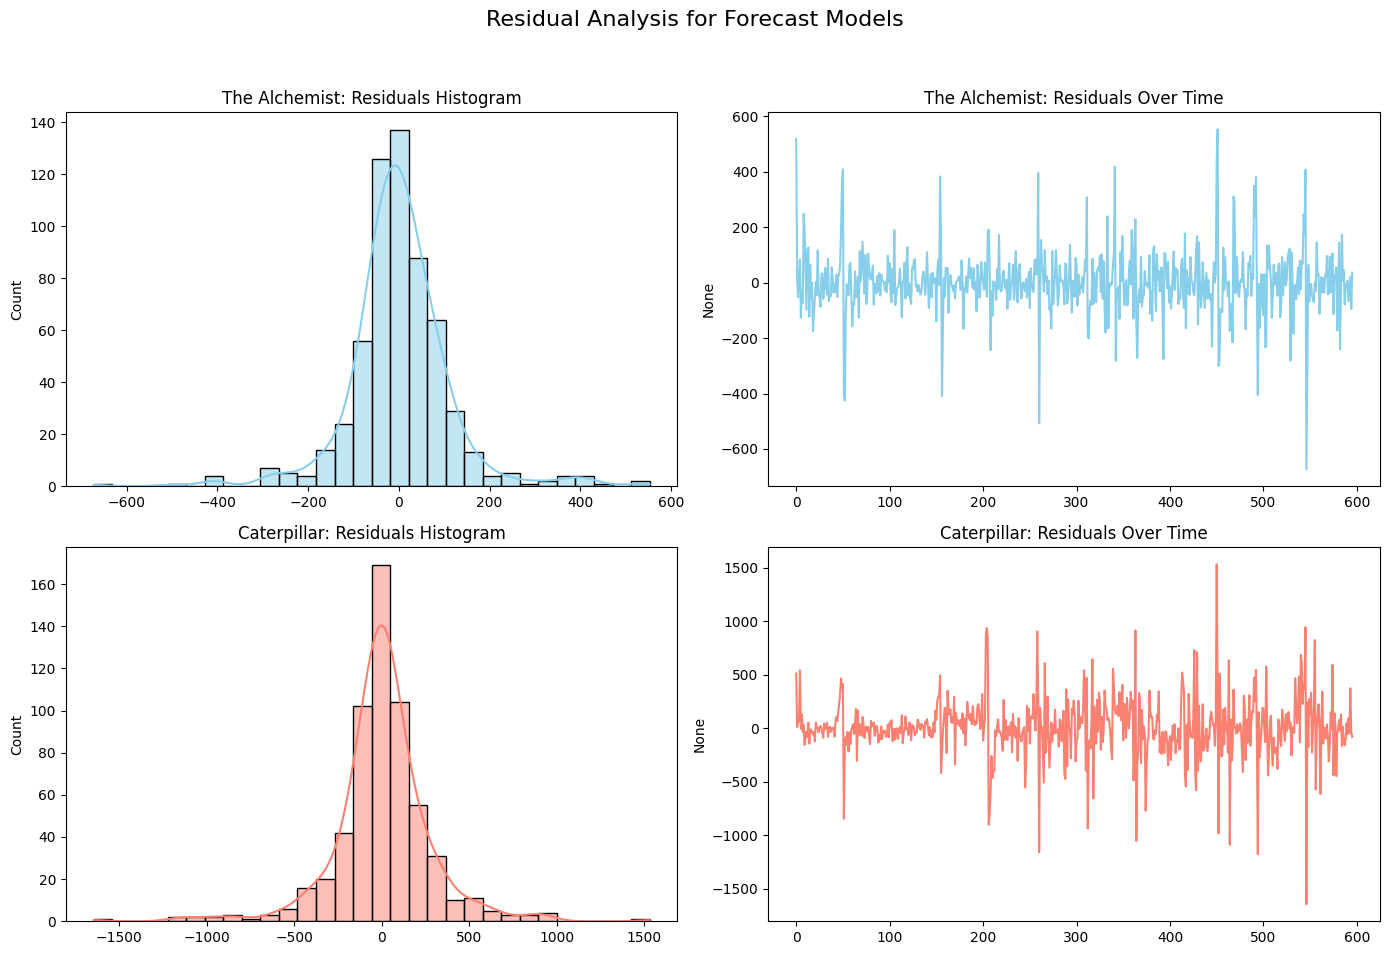

In [ ]:
# Set up the plotting area
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Residual Analysis for Forecast Models", fontsize=16)

# The Alchemist - Histogram
sns.histplot(residuals_alch, bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("The Alchemist: Residuals Histogram")

# The Alchemist - Time Series
sns.lineplot(x=range(len(residuals_alch)), y=residuals_alch, ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title("The Alchemist: Residuals Over Time")

# The Very Hungry Caterpillar - Histogram
sns.histplot(residuals_cat, bins=30, kde=True, ax=axes[1, 0], color='salmon')
axes[1, 0].set_title("Caterpillar: Residuals Histogram")

# The Very Hungry Caterpillar - Time Series
sns.lineplot(x=range(len(residuals_cat)), y=residuals_cat, ax=axes[1, 1], color='salmon')
axes[1, 1].set_title("Caterpillar: Residuals Over Time")

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Both residual histograms appear normally distributed, although 'The Very Hungry Caterpillar' does seem to skew slightly right.

Both models seem to be performing well, however Caterpillar is more volatile, with larger residual variance, and some outliers.

It seems that sales for Caterpillar are more erratic and harder to predict. This could be due to category (children's vs. literary fiction), as we could expect different purchasing patterns, seasonal events and / or marketing campaigns.

### f. Forecast the models

In [ ]:
# Forecast with ARIMA Alchemist
arima_forecast_alch = arima_model_alch.predict(n_periods=len(alch_test))

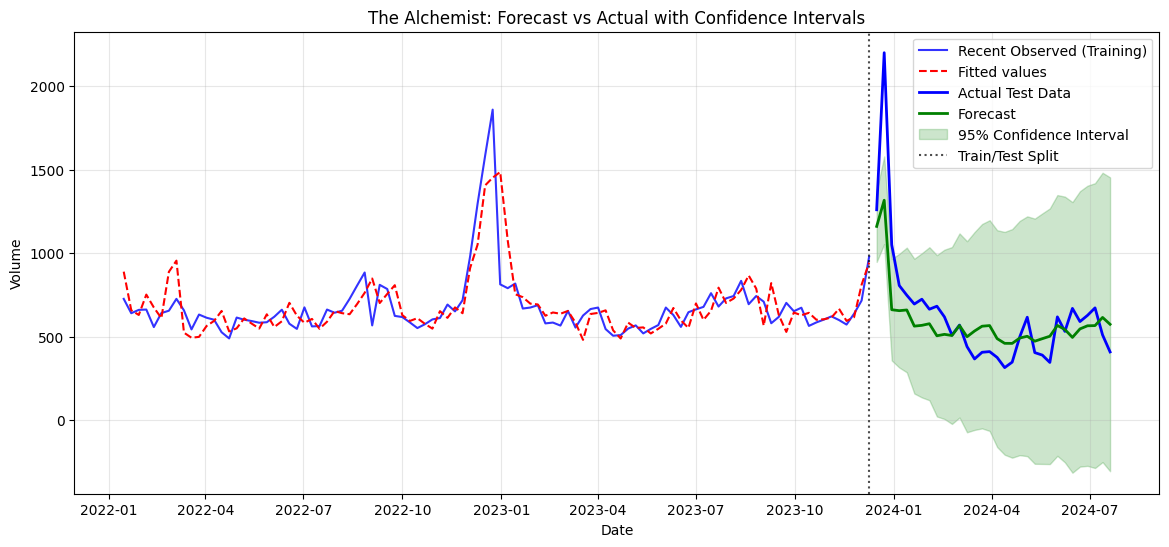

In [ ]:
# Focus on the forecasted period + some context
forecast_focus = 100  # Points before forecast period to show for context

# Get the starting index for the focused view
focus_start_idx = max(0, len(alch_train) - forecast_focus)

# Get forecast with confidence intervals
forecast_result = arima_model_alch.predict(n_periods=32, return_conf_int=True)
forecast_values = forecast_result[0]  # Point forecasts
conf_int = forecast_result[1]  # Confidence intervals

plt.figure(figsize=(14, 6))

# Plot recent training data for context
plt.plot(alch_train.index[focus_start_idx:],
         alch_train.iloc[focus_start_idx:],
         label='Recent Observed (Training)', color='blue', alpha=0.8)

# Plot fitted values for the same recent period
fitted_vals = arima_model_alch.fittedvalues()
plt.plot(alch_train.index[focus_start_idx:],
         fitted_vals[focus_start_idx:],
         label='Fitted values', linestyle='--', color='red')

# Plot actual test data
plt.plot(alch_test.index, alch_test,
         label='Actual Test Data', color='blue', linewidth=2)

# Plot forecasted values
plt.plot(alch_test.index, forecast_values,
         label='Forecast', color='green', linewidth=2)

# Add confidence intervals
plt.fill_between(alch_test.index,
                 conf_int[:, 0],  # Lower bound
                 conf_int[:, 1],  # Upper bound
                 color='green', alpha=0.2, label='95% Confidence Interval')

# Add vertical line to separate training and test
plt.axvline(x=alch_train.index[-1], color='black', linestyle=':', alpha=0.7,
            label='Train/Test Split')

plt.title('The Alchemist: Forecast vs Actual with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Forecast with ARIMA Caterpillar
arima_forecast_cat = arima_model_cat.predict(n_periods=len(cat_test))

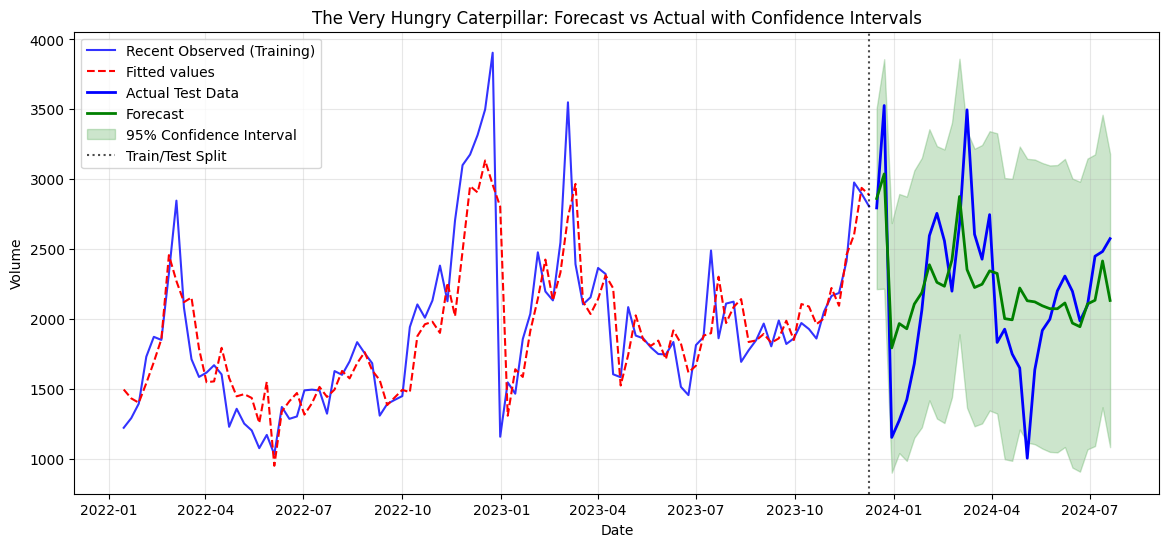

In [ ]:
# Focus on the forecasted period + some context
forecast_focus = 100  # Points before forecast period to show for context

# Get the starting index for the focused view
focus_start_idx = max(0, len(cat_train) - forecast_focus)

# Get forecast with confidence intervals
forecast_result = arima_model_cat.predict(n_periods=32, return_conf_int=True)
forecast_values = forecast_result[0]  # Point forecasts
conf_int = forecast_result[1]  # Confidence intervals

plt.figure(figsize=(14, 6))

# Plot recent training data for context
plt.plot(cat_train.index[focus_start_idx:],
         cat_train.iloc[focus_start_idx:],
         label='Recent Observed (Training)', color='blue', alpha=0.8)

# Plot fitted values for the same recent period
fitted_vals = arima_model_cat.fittedvalues()
plt.plot(cat_train.index[focus_start_idx:],
         fitted_vals[focus_start_idx:],
         label='Fitted values', linestyle='--', color='red')

# Plot actual test data
plt.plot(cat_test.index, cat_test,
         label='Actual Test Data', color='blue', linewidth=2)

# Plot forecasted values
plt.plot(cat_test.index, forecast_values,
         label='Forecast', color='green', linewidth=2)

# Add confidence intervals
plt.fill_between(cat_test.index,
                 conf_int[:, 0],  # Lower bound
                 conf_int[:, 1],  # Upper bound
                 color='green', alpha=0.2, label='95% Confidence Interval')

# Add vertical line to separate training and test
plt.axvline(x=alch_train.index[-1], color='black', linestyle=':', alpha=0.7,
            label='Train/Test Split')

plt.title('The Very Hungry Caterpillar: Forecast vs Actual with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

As to be expected, Alchemist sales are easier to predict as it is has more stable patterns than Caterpillar. However, both models are performing pretty well.

## **6. XGBoost**

### a. Create pipeline for XGBoost model

In [ ]:
# MAPE function
def robust_mape(y_true, y_pred, epsilon=1e-8):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denominator = np.maximum(np.abs(y_true) + np.abs(y_pred), epsilon)
    smape = np.mean(2 * np.abs(y_true - y_pred) / denominator) * 100
    return smape

In [ ]:
# Function to create input-output sequences
def create_input_output_sequences(lookback, forecast, sequence_data):
    X, y = [], []
    for i in range(lookback, len(sequence_data) - forecast + 1):
        X.append(sequence_data[i - lookback: i])
        y.append(sequence_data[i: i + forecast])
    return np.array(X), np.array(y)

In [ ]:
def xgboost_train(X_train, y_train):
    model = XGBRegressor(
        n_estimators=400,
        max_depth=7,
        learning_rate=0.1,
        subsample=0.5,
        colsample_bytree=1,
        gamma=0,
        tree_method='exact'
    )
    y_train = y_train.reshape(y_train.shape[0], -1)  # Flatten outputs
    model.fit(X_train, y_train)
    return model

In [ ]:
def xgboost_predictions(model, test_input):
    return model.predict(np.asarray([test_input]))[0]

In [ ]:
# Walk-forward validation using robust MAPE
def walk_forward_validation_xgb(series, lookback=52, forecast=32):
    predictions = []
    actuals = []

    train = series[:-(forecast)]
    test = series[-(forecast + lookback):]  # last segment for rolling prediction

    for i in range(forecast):
        train_window = np.concatenate([train, test[:i]])
        X_train, y_train = create_input_output_sequences(lookback, 1, train_window)

        model = xgboost_train(X_train, y_train)

        last_input = train_window[-lookback:]
        pred = xgboost_predictions(model, last_input)

        predictions.append(pred)
        actuals.append(test[i])

    predictions = np.array(predictions).flatten()
    actuals = np.array(actuals).flatten()

    mae = mean_absolute_error(actuals, predictions)
    mape = robust_mape(actuals, predictions)

    plt.figure(figsize=(12, 6))

    # Actual data (last lookback + forecast window)
    plt.plot(
        range(len(series) - forecast - lookback, len(series)),
        series[-(forecast + lookback):],
        label="Actual",
        marker="o",
        color="blue"
    )

    # Forecast data (last forecast window only)
    plt.plot(
        range(len(series) - forecast, len(series)),
        predictions,
        label="Forecast",
        marker="x",
        linestyle="--",
        color="orange"
    )

    plt.legend()
    plt.title(f"Walk-Forward XGBoost Forecast (Lookback={lookback}) - Zoomed In")
    plt.xlabel("Time Index")
    plt.ylabel("Value")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    return mae, mape, actuals, predictions

### b. Run on "The Very Hungry Caterpillar"

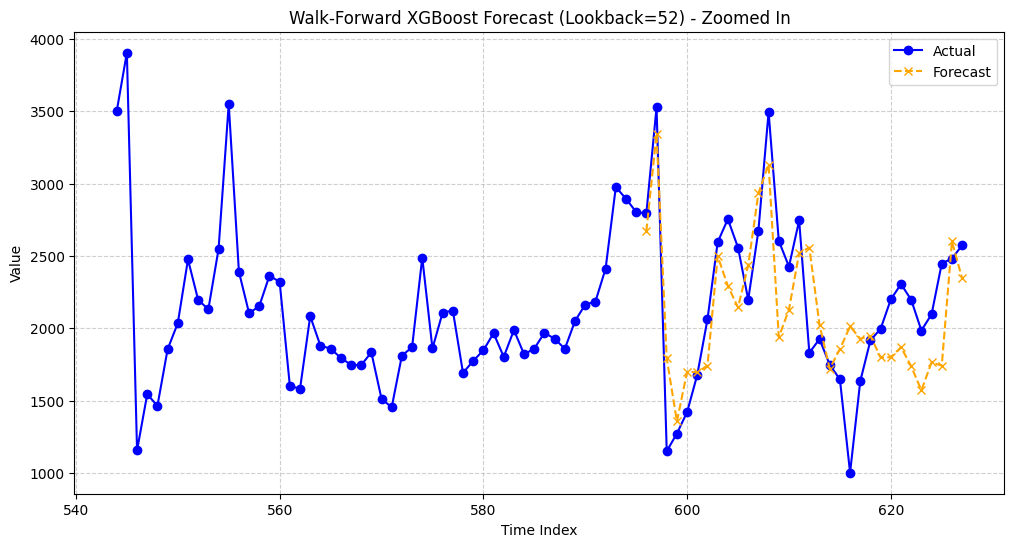

MAE: 233.73
Robust MAPE: 10.86%


In [ ]:
# For The Very Hungry Caterpillar
mae_cat, mape_cat, actuals_cat, preds_cat = walk_forward_validation_xgb(
    cat['Volume'].values,
    lookback=52,
    forecast=32
)
print(f"MAE: {mae_cat:.2f}")
print(f"Robust MAPE: {mape_cat:.2f}%")

### c. Run on "The Alchemist"

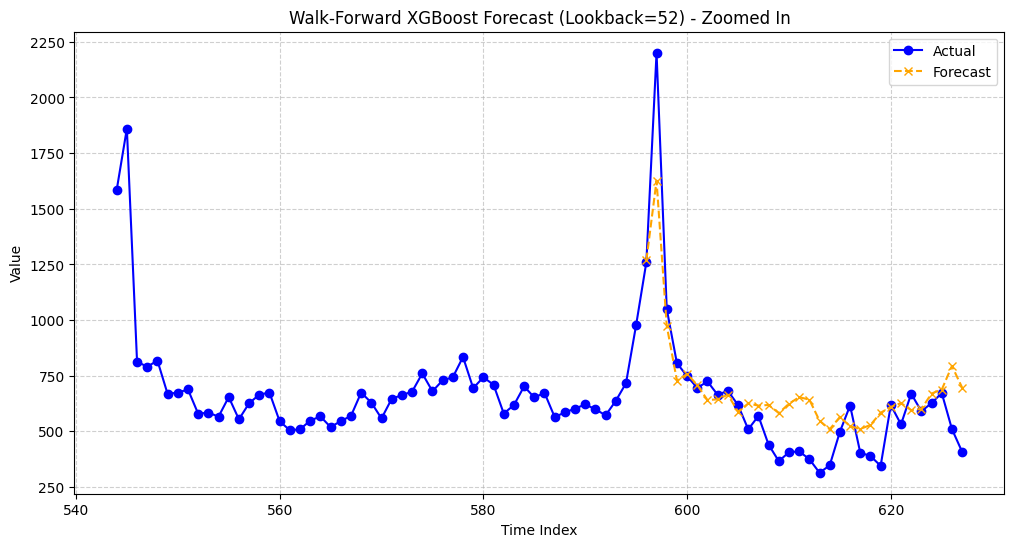

MAE: 55.15
Robust MAPE: 6.92%


In [ ]:
# For The Alchemist
mae_alch, mape_alch, actuals_alch, preds_alch = walk_forward_validation_xgb(
    alch['Volume'].values,
    lookback=52,
    forecast=32
)
print(f"MAE: {mae_alch:.2f}")
print(f"Robust MAPE: {mape_alch:.2f}%")

### d. Cross validation

In [ ]:
def xgboost_fold_prediction (model, test_series, lookback):
    preds = []
    for i in range(len(test_series)):
        if i < lookback:
            input_window = test_series[i:i+lookback]
        else:
            input_window = np.concatenate([test_series[i-lookback:i]])
        pred = model.predict(input_window.reshape(1, -1))[0]
        preds.append(pred)
    return np.array(preds)

# Define cross-validation
def cross_validation_xgboost (series, lookback=52, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    maes, mapes = [], []

    for train_index, test_index in tscv.split(series):
        train_series = series[train_index]
        test_series = series[test_index]

        # Prepare training data
        X_train, y_train = create_input_output_sequences(lookback, 1, train_series)
        model = xgboost_train(X_train, y_train)

        # Multi-step prediction using only *true historical values* in test
        preds = []
        for i in range(len(test_series)):
            # Take last 'lookback' points from available series
            if i < lookback:
                input_window = np.concatenate([train_series, test_series[:i]])[-lookback:]
            else:
                input_window = test_series[i-lookback:i]
            pred = xgboost_predictions(model, input_window)
            preds.append(pred)

        preds = np.array(preds)
        test_series = np.array(test_series)

        # Metrics using robust MAPE
        mae = mean_absolute_error(test_series, preds)
        mape = robust_mape(test_series, preds)
        maes.append(mae)
        mapes.append(mape)

    avg_mae = np.mean(maes)
    avg_mape = np.mean(mapes)

    print(f"Cross-Validation MAE: {avg_mae:.2f}")
    print(f"Cross-Validation Robust MAPE: {avg_mape:.2f}%")

    return avg_mae, avg_mape

In [ ]:
# Run cross-validation for The Alchemist
avg_mae_alch, avg_mape_alch = cross_validation_xgboost(alch['Volume'].values, lookback=52, n_splits=5)

Cross-Validation MAE: 93.74
Cross-Validation Robust MAPE: 16.21%


In [ ]:
# Run cross-validation for Caterpillar
avg_mae_cat, avg_mape_cat = cross_validation_xgboost (cat['Volume'].values, lookback=52, n_splits=5)

Cross-Validation MAE: 367.67
Cross-Validation Robust MAPE: 25.50%


## **7. XGBoost parameter tuning**

### a. Parameter tuning

In [ ]:
# Create lag features
def create_lag_features(df, column, window_length):
    df_lags = df.copy()
    for lag in range(1, window_length+1):
        df_lags[f"{column}_lag_{lag}"] = df_lags[column].shift(lag)
    df_lags = df_lags.dropna()
    return df_lags

In [ ]:
# Param grid
param_grid = {
    'window_length': [4, 8, 12],  # 1 month, 2 months, 3 months
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
}

tscv = TimeSeriesSplit(n_splits=3)

In [ ]:
# Grid search function
def run_grid_search(series):
    # Convert to Series
    if isinstance(series, pd.DataFrame):
        if series.shape[1] != 1:
            raise ValueError("DataFrame must have exactly one column")
        series = series.iloc[:, 0]

    results = []
    for wl in param_grid['window_length']:
        df_lags = create_lag_features(series.to_frame(), series.name, wl)
        X = df_lags.drop(series.name, axis=1)
        y = df_lags[series.name]

        xgb = XGBRegressor(
            n_jobs=1,  # save RAM
            objective='reg:squarederror',
            verbosity=0
        )

        # Remove window_length from params for XGB
        other_params = {k: v for k, v in param_grid.items() if k != 'window_length'}

        grid = GridSearchCV(
            xgb,
            param_grid=other_params,
            cv=tscv,
            scoring='neg_mean_squared_error'
        )
        grid.fit(X, y)
        results.append({'window_length': wl, 'best_params': grid.best_params_, 'best_score': grid.best_score_})
        # Print the results
        print(f" Window: {wl}, Best Params: {grid.best_params_} , Best Score: {grid.best_score_}")

    return results

### b. Run for each book

In [ ]:
# Run search for 'The Very Hungry Caterpillar'
cat_xg_grid = run_grid_search(cat)

 Window: 4, Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50} , Best Score: -280910.5081529931
 Window: 8, Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50} , Best Score: -274782.56612575153
 Window: 12, Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50} , Best Score: -289242.6847376087


In [ ]:
# Run for 'The Alchemist'
alch_xg_grid = run_grid_search(alch)

 Window: 4, Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50} , Best Score: -26775.842251627586
 Window: 8, Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100} , Best Score: -23774.774836291745
 Window: 12, Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100} , Best Score: -22141.193939877416


In [ ]:
# Define function to
def evaluate_xgb(series, best_params, window_length, forecast_horizon=32, cv_splits=3):
    series = series.copy()

    # Split into train and test
    train = series[:-forecast_horizon]
    test = series[-forecast_horizon:]

    # Create lag features on training data
    df_lags = create_lag_features(train.to_frame(), series.name, window_length)
    X_train = df_lags.drop(series.name, axis=1)
    y_train = df_lags[series.name]

    # Define model
    model = XGBRegressor(
        objective='reg:squarederror',
        n_jobs=1,
        verbosity=0,
        **best_params
    )

    # Cross-validation
    tscv = TimeSeriesSplit(n_splits=cv_splits)
    cv_scores = cross_val_score(model, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
    print(f"CV MSE: {-np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}")

    # Fit on full training data
    model.fit(X_train, y_train)

    # Recursive prediction for test period
    last_values = train[-window_length:].values.tolist()
    preds = []
    for _ in range(forecast_horizon):
        X_pred = np.array(last_values[-window_length:]).reshape(1, -1)
        y_pred = model.predict(X_pred)[0]
        preds.append(y_pred)
        last_values.append(y_pred)

    preds = pd.Series(preds, index=test.index, name=f'{series.name}_pred')

    # Metrics
    mae = mean_absolute_error(test, preds)
    mape = np.mean(np.abs((test - preds) / test)) * 100
    print(f"MAE: {mae:.2f}, MAPE: {mape:.2f}%")

    # Plot only forecast window
    plt.figure(figsize=(12,5))
    plt.plot(test, label='Actual', marker='o')
    plt.plot(preds, label='Predicted', linestyle='--', marker='x')
    plt.title(f"{series.name} - Last {forecast_horizon} Weeks Forecast")
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

    return preds

### c. Run best model - "The Very Hungry Caterpillar"

CV MSE: 315035.86 ± 89512.87
MAE: 546.93, MAPE: 28.27%


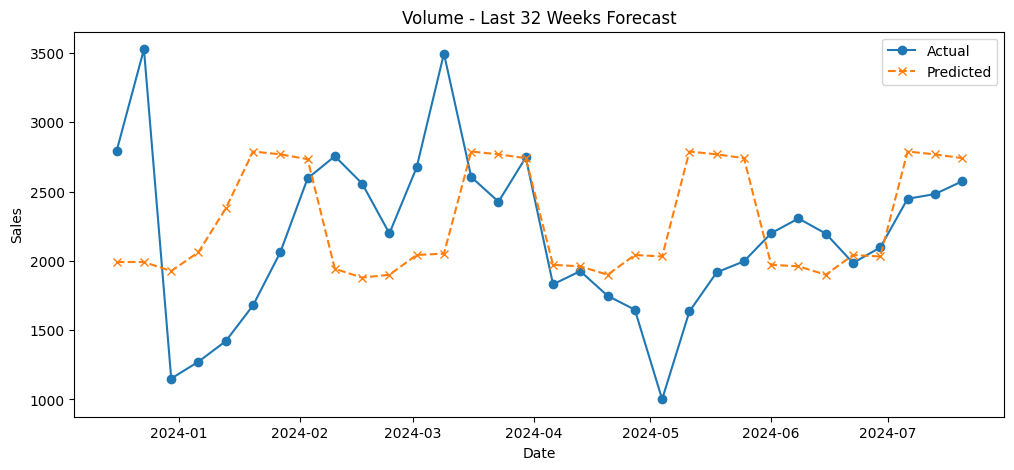

In [ ]:
# Run best model
cat_series = cat['Volume']
cat_preds = evaluate_xgb(
    cat_series,
    best_params={'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50},
    window_length=8,
    forecast_horizon=32
)

### d. Run best model - "The Alchemist"

CV MSE: 19853.06 ± 5458.38
MAE: 264.51, MAPE: 47.63%


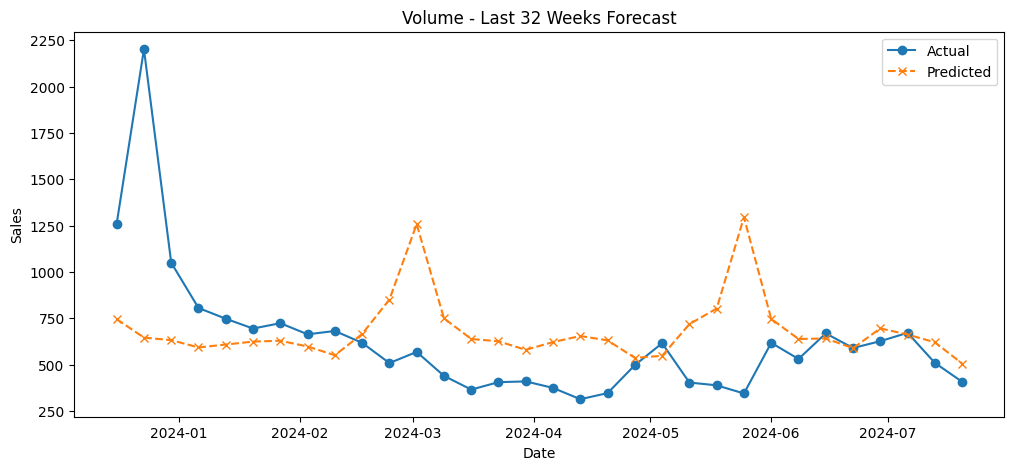

In [ ]:
# Run best model
alch_series = alch['Volume']
alch_preds = evaluate_xgb(
    alch_series,
    best_params={'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100},
    window_length=12,
    forecast_horizon=32
)

## **8. LSTM**

In [ ]:
tf.random.set_seed(0)

In [ ]:
def lstm_forecast_weekly(series, book_name, lookback=12, forecast=32, max_trials=2, epochs=200):

    # Keep index for plotting
    original_index = series.index

    # Scale data
    scaler = MinMaxScaler()
    scaled_series = scaler.fit_transform(series.values.reshape(-1, 1))

    # Create input/output sequences for training on all but forecast
    train_scaled = scaled_series[:-forecast]
    seq_data = create_input_sequences(lookback, forecast, train_scaled)
    X, y = seq_data["input_sequences"], seq_data["output_sequences"]

    # Define the model for hyperparameter tuning
    def tuned_model(hp):
        model = Sequential()
        model.add(LSTM(hp.Int('input_unit', 8, 128, step=8), return_sequences=True, input_shape=(lookback,1)))
        for i in range(hp.Int('n_layers', 1, 2)):
            model.add(LSTM(hp.Int(f'lstm_{i}_units', 8, 128, step=8), return_sequences=True))
        model.add(LSTM(hp.Int('last_layer_units', 8, 128, step=8)))
        model.add(Dropout(hp.Float('dropout', 0, 0.5, step=0.1)))
        model.add(Dense(forecast, activation='linear'))
        model.compile(loss='mse', optimizer='adam')
        return model

    # Hyperparameter tuning
    tuner = RandomSearch(
        tuned_model,
        objective='val_loss',
        max_trials=max_trials,
        executions_per_trial=1
    )
    tuner.search(X, y, epochs=epochs, batch_size=32, verbose=0, validation_split=0.2)

    # Get best model and recompile
    best_model = tuner.get_best_models(num_models=1)[0]
    best_model.compile(loss="mse", optimizer="adam")

    # Prepare last input sequence for forecasting final weeks
    last_input_sequence = scaled_series[-forecast - lookback:-forecast].reshape(1, lookback, 1)
    pred_scaled = best_model.predict(last_input_sequence)
    predictions = scaler.inverse_transform(pred_scaled).flatten()

    # Forecast index matches the last 'forecast' weeks of actual data
    forecast_index = series.index[-forecast:]

    # Plot actual vs forecast
    plt.figure(figsize=(12,5))

    # Actual values
    plt.plot(
        series.index,
        series.values,
        label=f"Actual - {book_name}",
        color="blue",
        marker="o"
    )

    # Forecast values
    plt.plot(
        forecast_index,
        predictions,
        label=f"Forecast - {book_name}",
        color="orange",
        linestyle="--",
        marker="x"
    )

    plt.title(f"LSTM Forecast vs Actuals - {book_name}")
    plt.xlabel("Date")
    plt.ylabel("Weekly Sales")

    zoom_start = series.index[-forecast - 12] if len(series) > forecast + 12 else series.index[0]
    plt.xlim([zoom_start, series.index[-1]])

    plt.legend()
    plt.show()

    # MAE and MAPE
    y_true = series[-forecast:].values
    mae = mean_absolute_error(y_true, predictions)
    mape = np.mean(np.abs((y_true - predictions) / y_true))

    print(f"{book_name} - MAE: {mae:.2f}, MAPE: {mape:.2%}")

    return predictions, forecast_index, best_model

Reloading Tuner from ./untitled_project/tuner0.json


1/1 [==============================] - 2s 2s/step


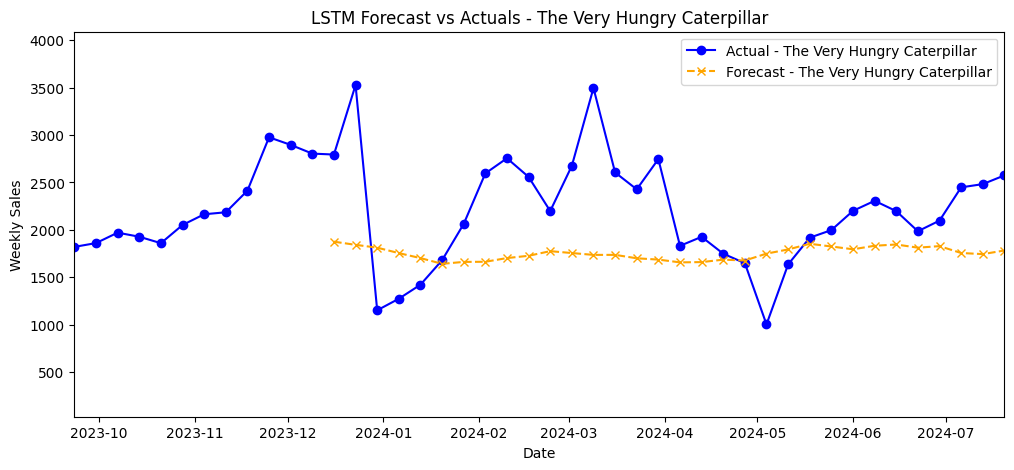

The Very Hungry Caterpillar - MAE: 581.67, MAPE: 25.98%


In [ ]:
pred_cat, idx_cat, model_cat = lstm_forecast_weekly(cat, "The Very Hungry Caterpillar", lookback=12, forecast=32)

Reloading Tuner from ./untitled_project/tuner0.json


1/1 [==============================] - 2s 2s/step


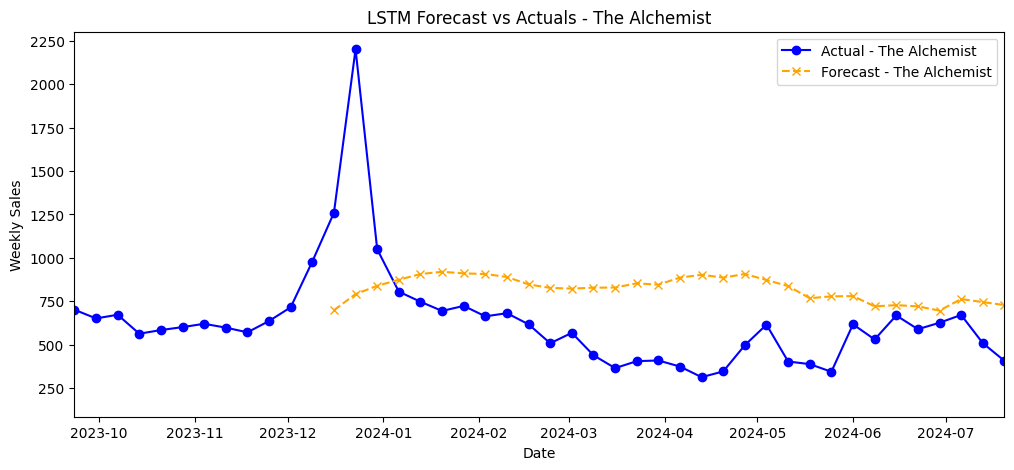

The Alchemist - MAE: 332.13, MAPE: 62.75%


In [ ]:
pred_alch, idx_alch, model_alch = lstm_forecast_weekly(alch, "The Alchemist", lookback=12, forecast=32)

## **9. Hybrid Model**

### a. Sequential

In [ ]:
def fit_sarima(series, order=(1,1,1), seasonal_order=(1,1,1,52)):
    model = SARIMAX(series, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    sarima_fit = model.fit(disp=False)

    fitted_values = sarima_fit.fittedvalues
    residuals = series - fitted_values

    return sarima_fit, fitted_values, residuals

In [ ]:
# Prepare residuals

def create_lstm_dataset(residuals, window_length=8):
    X, y = [], []
    for i in range(len(residuals) - window_length):
        X.append(residuals[i:i+window_length])
        y.append(residuals[i+window_length])
    X, y = np.array(X), np.array(y)
    X = X.reshape((X.shape[0], X.shape[1], 1))
    return X, y

In [ ]:
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=8, max_value=32, step=8),
                   activation='relu',
                   input_shape=(hp.Fixed('window_length', 8), 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def tune_lstm(X_train, y_train, max_trials=5, epochs=20):
    tuner = RandomSearch(
        build_lstm_model,
        objective='val_loss',
        max_trials=max_trials,
        executions_per_trial=1,
        directory='lstm_tuning',
        project_name='residual_lstm'
    )
    tuner.search(X_train, y_train, validation_split=0.2, epochs=epochs, verbose=0)
    best_model = tuner.get_best_models(num_models=1)[0]
    return best_model

In [ ]:
def forecast_lstm(model, residuals, forecast_horizon=32, window_length=8):
    last_window = residuals[-window_length:].tolist()
    preds = []
    for _ in range(forecast_horizon):
        X_input = np.array(last_window[-window_length:]).reshape((1, window_length, 1))
        pred = model.predict(X_input, verbose=0)[0,0]
        preds.append(pred)
        last_window.append(pred)
    return np.array(preds)

In [ ]:
def evaluate_hybrid(series, sarima_fit, residuals, lstm_model, forecast_horizon=32, window_length=8):
    # SARIMA forecast
    sarima_forecast = sarima_fit.forecast(steps=forecast_horizon)

    # LSTM residual forecast
    lstm_forecast = forecast_lstm(lstm_model, residuals.values, forecast_horizon, window_length)

    # Hybrid forecast
    hybrid_forecast = sarima_forecast.values + lstm_forecast

    # Metrics
    actual = series[-forecast_horizon:]
    mae = mean_absolute_error(actual, hybrid_forecast)
    mape = np.mean(np.abs((actual - hybrid_forecast)/actual)) * 100

    # Plot
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12,5))
    plt.plot(actual.index, actual.values, label='Actual', marker='o')
    plt.plot(actual.index, hybrid_forecast, label='Hybrid Forecast', linestyle='--', marker='x')
    plt.title('Hybrid SARIMA + LSTM Forecast (Last 32 Weeks)')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

    print(f"MAE: {mae:.2f}, MAPE: {mape:.2f}%")

    return hybrid_forecast


Reloading Tuner from lstm_tuning/residual_lstm/tuner0.json


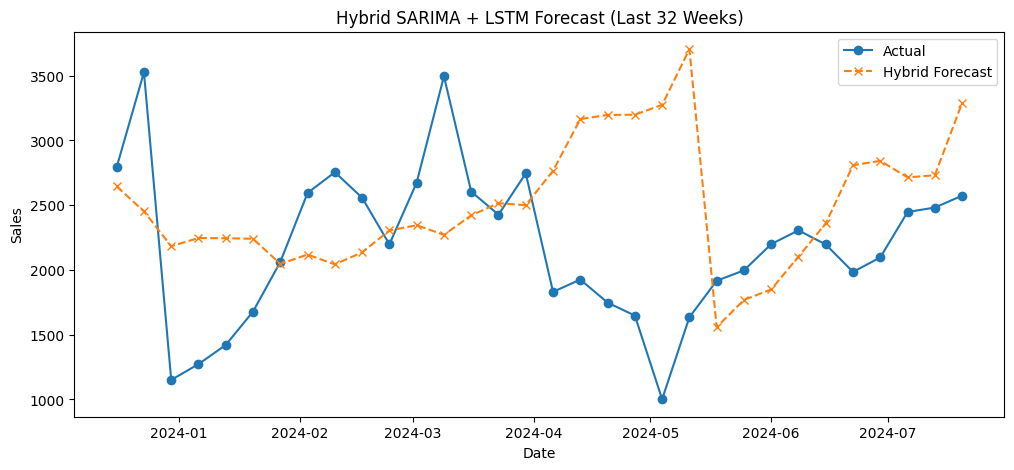

MAE: 688.75, MAPE: 39.40%


In [ ]:
# Run for Caterpillar
sarima_fit, fitted_values, residuals = fit_sarima(cat_series)

X_train, y_train = create_lstm_dataset(residuals.values, window_length=8)

lstm_model = tune_lstm(X_train, y_train, max_trials=5, epochs=20)

hybrid_forecast = evaluate_hybrid(cat_series, sarima_fit, residuals, lstm_model, forecast_horizon=32)

Reloading Tuner from lstm_tuning/residual_lstm/tuner0.json


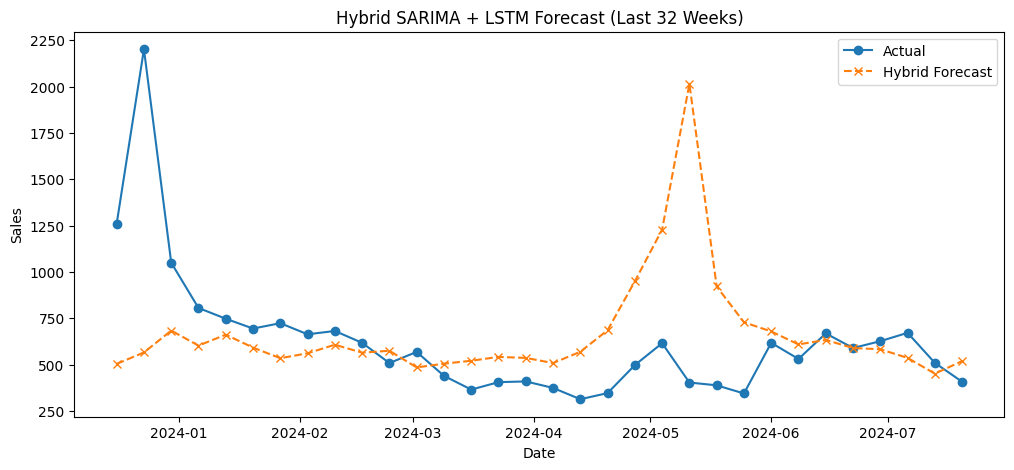

MAE: 282.63, MAPE: 49.34%


In [ ]:
# Run for Alchemist
sarima_fit, fitted_values, residuals = fit_sarima(alch_series)

X_train, y_train = create_lstm_dataset(residuals.values, window_length=8)

lstm_model = tune_lstm(X_train, y_train, max_trials=5, epochs=20)

hybrid_forecast = evaluate_hybrid(alch_series, sarima_fit, residuals, lstm_model, forecast_horizon=32)

### b. Parallel

In [ ]:
# Function to train SARIMA on full series and return the fitted model
def train_sarima(series, order=(1,1,1), seasonal_order=(1,1,1,52)):
    model = SARIMAX(series, order=order, seasonal_order=seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    sarima_fit = model.fit(disp=False)
    return sarima_fit

In [ ]:
# Convert series to supervised dataset for LSTM
def create_lstm_dataset(series, window_length=8):

    X, y = [], []
    for i in range(len(series) - window_length):
        X.append(series[i:i+window_length])
        y.append(series[i+window_length])
    X = np.array(X).reshape(-1, window_length, 1)
    y = np.array(y)
    return X, y

In [ ]:
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units', 8, 32, step=8),
        activation='relu',
        input_shape=(hp.Fixed('window_length', 8), 1)
    ))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def tune_lstm(X_train, y_train, max_trials=5, epochs=20):
    tuner = RandomSearch(
        build_lstm_model,
        objective='val_loss',
        max_trials=max_trials,
        executions_per_trial=1,
        directory='lstm_parallel_tuning',
        project_name='lstm_parallel'
    )
    tuner.search(X_train, y_train, validation_split=0.2, epochs=epochs, verbose=0)
    best_model = tuner.get_best_models(num_models=1)[0]
    return best_model

In [ ]:
def forecast_lstm(model, series, forecast_horizon=32, window_length=8):
    last_window = series[-window_length:].tolist()
    preds = []
    for _ in range(forecast_horizon):
        X_input = np.array(last_window[-window_length:]).reshape((1, window_length, 1))
        pred = model.predict(X_input, verbose=0)[0,0]
        preds.append(pred)
        last_window.append(pred)
    return np.array(preds)

In [ ]:
def hybrid_parallel_forecast(series, sarima_fit, lstm_model, forecast_horizon=32, window_length=8, weight_grid=np.arange(0, 1.1, 0.1)):
    # Forecast SARIMA
    sarima_forecast = sarima_fit.forecast(steps=forecast_horizon).values

    # Forecast LSTM
    lstm_forecast = forecast_lstm(lstm_model, series.values, forecast_horizon, window_length)

    # Tune weight
    actual = series[-forecast_horizon:].values
    best_mae = float('inf')
    best_weight = 0.5
    for w in weight_grid:
        combined = w*sarima_forecast + (1-w)*lstm_forecast
        mae = mean_absolute_error(actual, combined)
        if mae < best_mae:
            best_mae = mae
            best_weight = w

    # Final forecast
    final_forecast = best_weight*sarima_forecast + (1-best_weight)*lstm_forecast

    # Metrics
    mape = np.mean(np.abs((actual - final_forecast)/actual)) * 100

    # Plot
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12,5))
    plt.plot(series.index[-forecast_horizon:], actual, label='Actual', marker='o')
    plt.plot(series.index[-forecast_horizon:], final_forecast, label=f'Hybrid Forecast (w={best_weight:.1f})', linestyle='--', marker='x')
    plt.title('Parallel Hybrid SARIMA + LSTM Forecast (Last 32 Weeks)')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

    print(f"Best weight for SARIMA: {best_weight:.1f}")
    print(f"MAE: {best_mae:.2f}, MAPE: {mape:.2f}%")

    return final_forecast

Reloading Tuner from lstm_parallel_tuning/lstm_parallel/tuner0.json


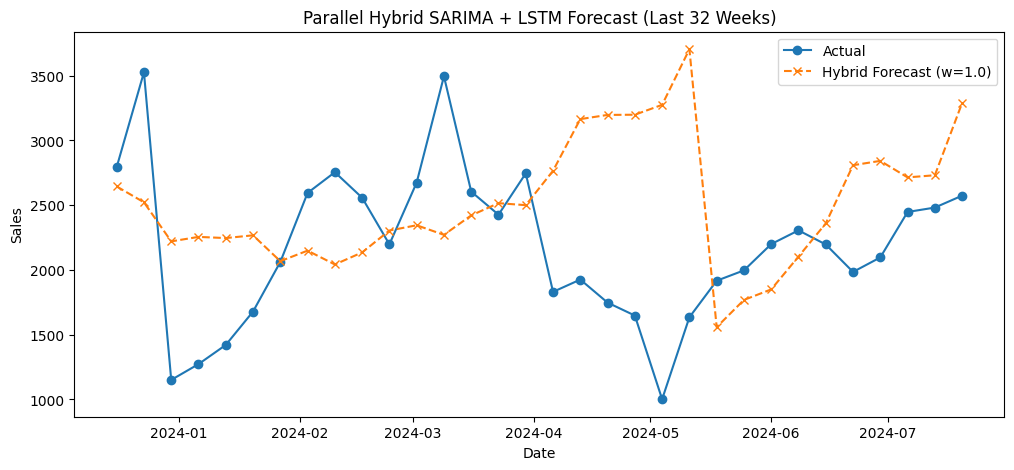

Best weight for SARIMA: 1.0
MAE: 687.68, MAPE: 39.46%


In [ ]:
# Run for Caterpillar
sarima_fit = train_sarima(cat_series)

X_train, y_train = create_lstm_dataset(cat_series.values, window_length=8)
lstm_model = tune_lstm(X_train, y_train, max_trials=5, epochs=20)

final_forecast = hybrid_parallel_forecast(
    cat_series,
    sarima_fit,
    lstm_model,
    forecast_horizon=32,
    window_length=8
)

Reloading Tuner from lstm_parallel_tuning/lstm_parallel/tuner0.json


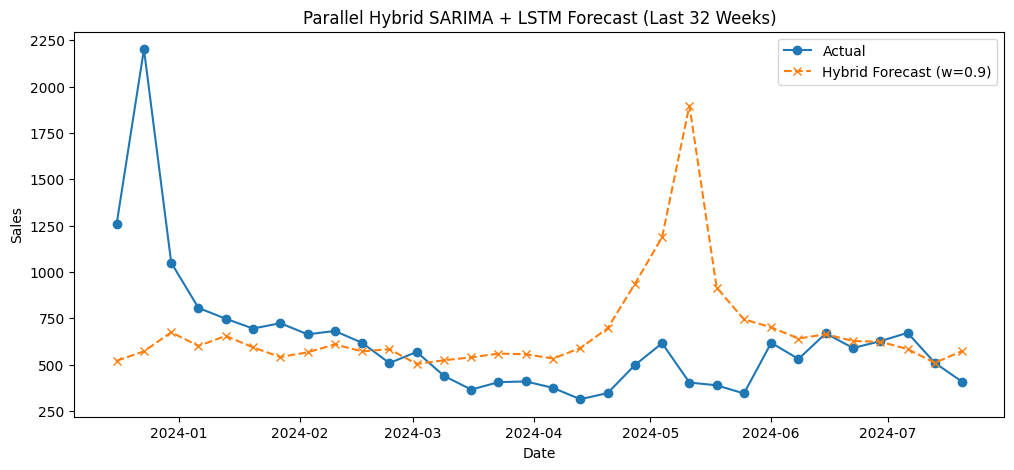

Best weight for SARIMA: 0.9
MAE: 279.43, MAPE: 49.14%


In [ ]:
# Run for Alchemist
sarima_fit = train_sarima(alch_series)

X_train, y_train = create_lstm_dataset(alch_series.values, window_length=8)
lstm_model = tune_lstm(X_train, y_train, max_trials=5, epochs=20)

final_forecast = hybrid_parallel_forecast(
    alch_series,
    sarima_fit,
    lstm_model,
    forecast_horizon=32,
    window_length=8
)

### c. Weightage in parallel combination

In [ ]:
#Tune the weight for parallel hybrid SARIMA + LSTM
def tune_hybrid_weight(series, sarima_fit, lstm_model, forecast_horizon=32, window_length=8, weight_grid=np.arange(0, 1.05, 0.05)):

    # Forecast SARIMA and LSTM
    sarima_forecast = sarima_fit.forecast(steps=forecast_horizon).values
    lstm_forecast = forecast_lstm(lstm_model, series.values, forecast_horizon, window_length)

    actual = series[-forecast_horizon:].values
    best_mae = float('inf')
    best_weight = 0.5
    best_forecast = None

    # Search for best weight
    for w in weight_grid:
        combined = w*sarima_forecast + (1-w)*lstm_forecast
        mae = mean_absolute_error(actual, combined)
        if mae < best_mae:
            best_mae = mae
            best_weight = w
            best_forecast = combined

    # Metrics
    mape = np.mean(np.abs((actual - best_forecast)/actual)) * 100

    # Plot
    plt.figure(figsize=(12,5))
    plt.plot(series.index[-forecast_horizon:], actual, label='Actual', marker='o')
    plt.plot(series.index[-forecast_horizon:], best_forecast, label=f'Hybrid Forecast (w={best_weight:.2f})', linestyle='--', marker='x')
    plt.title('Parallel Hybrid SARIMA + LSTM Forecast (Last 32 Weeks)')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

    print(f"Best weight for SARIMA: {best_weight:.2f}")
    print(f"MAE: {best_mae:.2f}, MAPE: {mape:.2f}%")

    return best_weight, best_forecast, best_mae, mape


Reloading Tuner from lstm_parallel_tuning/lstm_parallel/tuner0.json


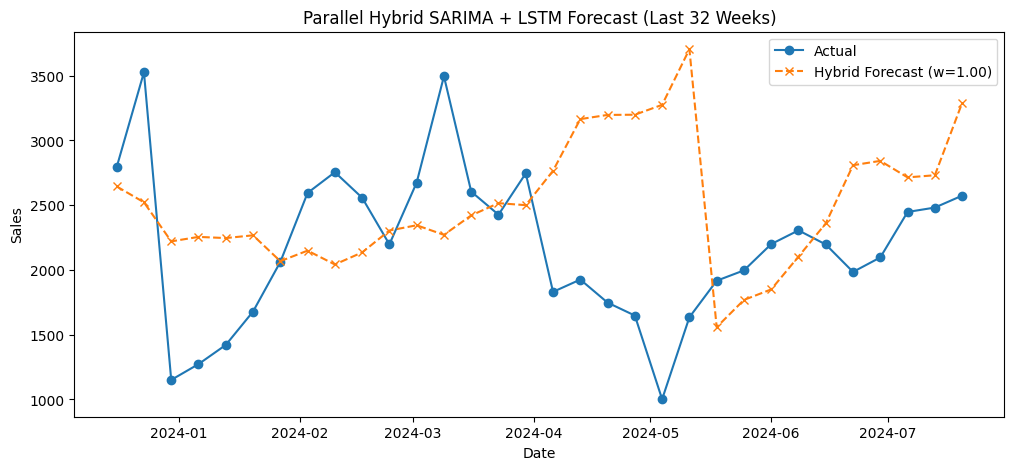

Best weight for SARIMA: 1.00
MAE: 687.68, MAPE: 39.46%


In [ ]:
# Train SARIMA
sarima_fit = train_sarima(cat_series)

# Prepare LSTM
X_train, y_train = create_lstm_dataset(cat_series.values, window_length=8)
lstm_model = tune_lstm(X_train, y_train, max_trials=5, epochs=20)

# Tune weight and get forecast
best_weight, final_forecast, mae, mape = tune_hybrid_weight(
    cat_series,
    sarima_fit,
    lstm_model,
    forecast_horizon=32,
    window_length=8
)

Reloading Tuner from lstm_parallel_tuning/lstm_parallel/tuner0.json


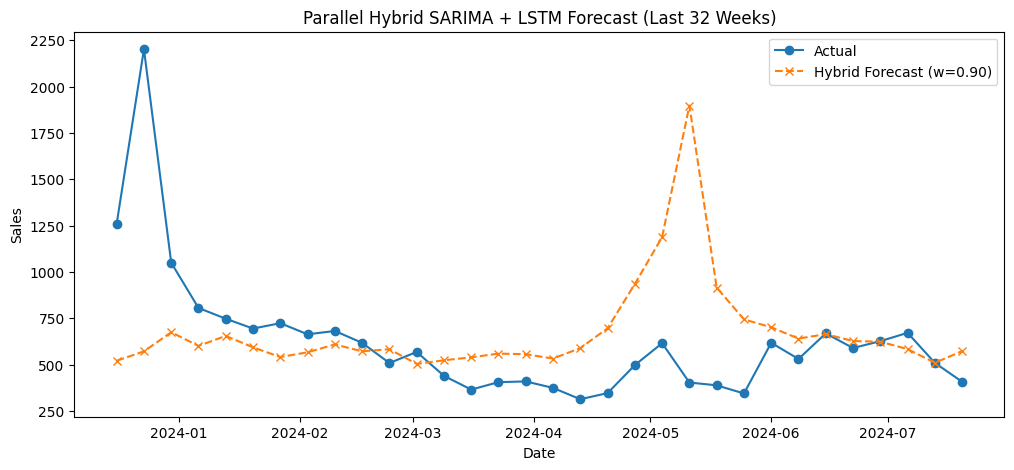

Best weight for SARIMA: 0.90
MAE: 279.43, MAPE: 49.14%


In [ ]:
# Train SARIMA
sarima_fit = train_sarima(alch_series)

# Prepare LSTM
X_train, y_train = create_lstm_dataset(alch_series.values, window_length=8)
lstm_model = tune_lstm(X_train, y_train, max_trials=5, epochs=20)

# Tune weight and get forecast
best_weight, final_forecast, mae, mape = tune_hybrid_weight(
    alch_series,
    sarima_fit,
    lstm_model,
    forecast_horizon=32,
    window_length=8
)

The weight values (0.9 for Alchemist and 1.0 for Caterpillar) indicate that the ARIMA component carries nearly all predictive power, suggesting LSTM contributes little additional value. The hybrids slightly reduce errors compared to standalone LSTM but do not drastically improve over SARIMA alone, especially for the more volatile Caterpillar.

## **10. Monthly analysis**

### a. Aggregate to monthly

In [ ]:
# Aggregate weekly data to monthly data
cat_monthly = cat_series.resample('M').sum()
alch_monthly = alch_series.resample('M').sum()

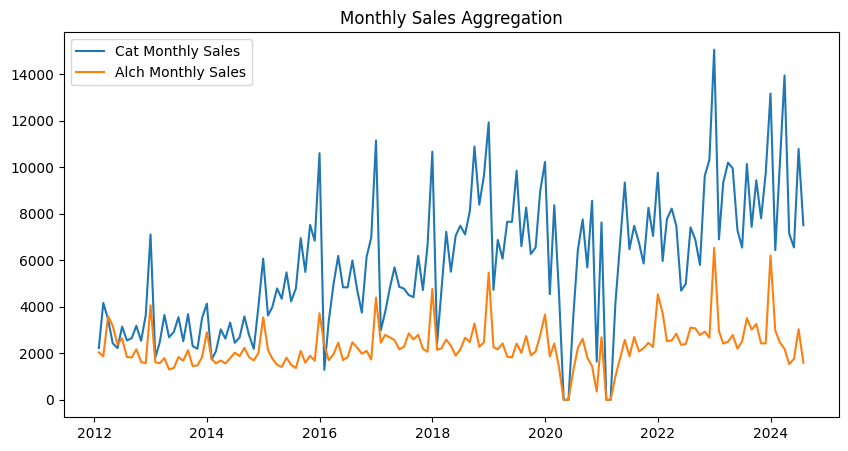

In [ ]:
# Plot to check
plt.figure(figsize=(10,5))
plt.plot(cat_monthly, label='Cat Monthly Sales')
plt.plot(alch_monthly, label='Alch Monthly Sales')
plt.title("Monthly Sales Aggregation")
plt.legend()
plt.show()

### b. XGBoost

In [ ]:
plt.rcParams["figure.figsize"] = (12, 6)

# Metrics
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mape(y_true, y_pred, eps=1e-8):
    denom = np.maximum(np.abs(y_true), eps)
    return np.mean(np.abs((y_true - y_pred) / denom)) * 100.0

# Feature engineering
def make_supervised_monthly_enhanced(series, max_lag=12):
    df = pd.DataFrame({"y": series})
    for l in range(1, max_lag + 1):
        df[f"lag_{l}"] = df["y"].shift(l)

    # Rolling averages
    df["roll3"] = df["y"].shift(1).rolling(3).mean()
    df["roll6"] = df["y"].shift(1).rolling(6).mean()
    df["roll12"] = df["y"].shift(1).rolling(12).mean()

    # Differences
    df["diff1"] = df["y"].diff(1).fillna(0)
    df["diff3"] = df["y"].diff(3).fillna(0)
    df["diff12"] = df["y"].diff(12).fillna(0)

    # Seasonal
    df["month_sin"] = np.sin(2 * np.pi * df.index.month / 12)
    df["month_cos"] = np.cos(2 * np.pi * df.index.month / 12)

    df = df.dropna()
    X = df.drop(columns=["y"])
    y = df["y"]
    return X, y

# Forecast plotting
def plot_actual_forecast(actual, forecast, title, forecast_horizon=8, context_months=4):
    start_idx = max(0, len(actual) - forecast_horizon - context_months)
    actual_zoom = actual.iloc[start_idx:]
    train_context = actual_zoom.iloc[:-forecast_horizon]
    actual_test = actual_zoom.iloc[-forecast_horizon:]
    historical_line = pd.concat([train_context, actual_test.iloc[:1]])

    plt.plot(historical_line.index, historical_line.values, label='Historical', color='blue')
    plt.plot(actual_test.index, actual_test.values, label='Actual', marker='o', color='blue')
    plt.plot(forecast.index, forecast.values, label='XGBoost Monthly Forecast', linestyle='--', marker='x', color='orange')
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

# Backtest function
def backtest_xgboost(series_monthly, horizon=8, max_lag=12):
    series_monthly = series_monthly.asfreq("M")
    train_series = series_monthly.iloc[:-horizon]
    test_series = series_monthly.iloc[-horizon:]

    # Train XGBoost
    X_train, y_train = make_supervised_monthly_enhanced(train_series, max_lag=max_lag)
    model_params = dict(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.03,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=1.0,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1
    )
    model = xgb.XGBRegressor(**model_params)
    model.fit(X_train, y_train)

    # Stepwise forecast
    forecast_values = []
    history = train_series.copy()

    for step in range(horizon):
        feats = {}
        # Lag features
        for l in range(1, max_lag + 1):
            feats[f"lag_{l}"] = history.iloc[-l] if len(history) >= l else history.iloc[-1]

        # Rolling averages
        feats["roll3"] = history.iloc[-3:].mean() if len(history) >= 3 else history.iloc[-1]
        feats["roll6"] = history.iloc[-6:].mean() if len(history) >= 6 else history.iloc[-1]
        feats["roll12"] = history.iloc[-12:].mean() if len(history) >= 12 else history.iloc[-1]

        # Differences
        feats["diff1"] = history.iloc[-1] - history.iloc[-2] if len(history) >= 2 else 0
        feats["diff3"] = history.iloc[-1] - history.iloc[-4] if len(history) >= 4 else 0
        feats["diff12"] = history.iloc[-1] - history.iloc[-13] if len(history) >= 13 else 0

        # Calendar features
        next_date = history.index[-1] + pd.offsets.MonthEnd(1)
        feats["month_sin"] = np.sin(2 * np.pi * next_date.month / 12)
        feats["month_cos"] = np.cos(2 * np.pi * next_date.month / 12)

        X_next = pd.DataFrame([feats])
        y_hat = float(model.predict(X_next)[0])
        y_hat = max(0, y_hat)
        forecast_values.append(y_hat)

        # Update history with actual for next step
        if step < len(test_series):
            history.loc[next_date] = test_series.iloc[step]

    xgb_forecast = pd.Series(forecast_values, index=test_series.index)
    print(f"MAE: {mae(test_series.values, xgb_forecast.values):.2f}")
    print(f"MAPE: {mape(test_series.values, xgb_forecast.values):.2f}%")
    plot_actual_forecast(series_monthly, xgb_forecast, "XGBoost Backtest Forecast", horizon)

    return xgb_forecast


MAE: 1068.79
MAPE: 40.21%


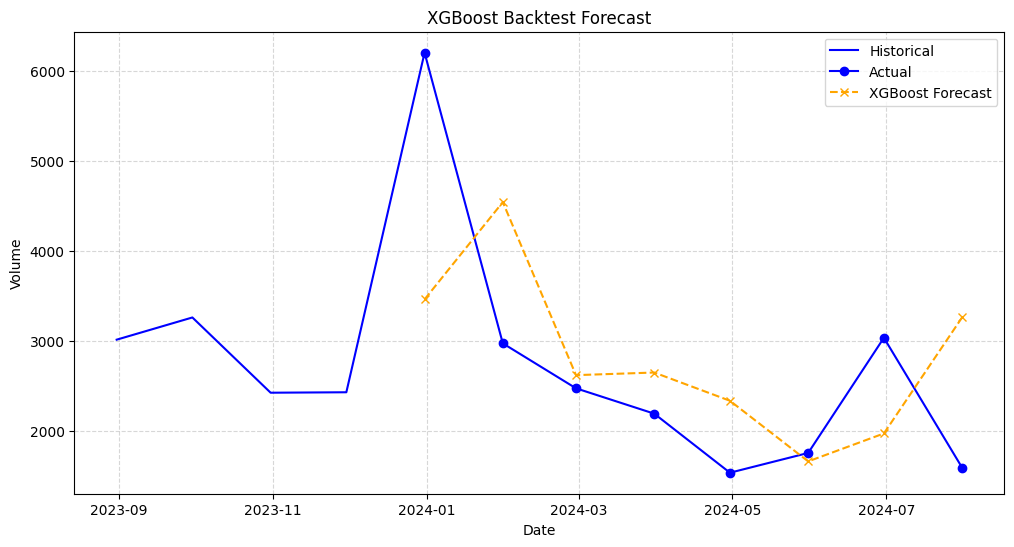

In [ ]:
 xgb_forecast_alch = backtest_xgboost(alch_monthly, horizon=8)

MAE: 3099.20
MAPE: 34.27%


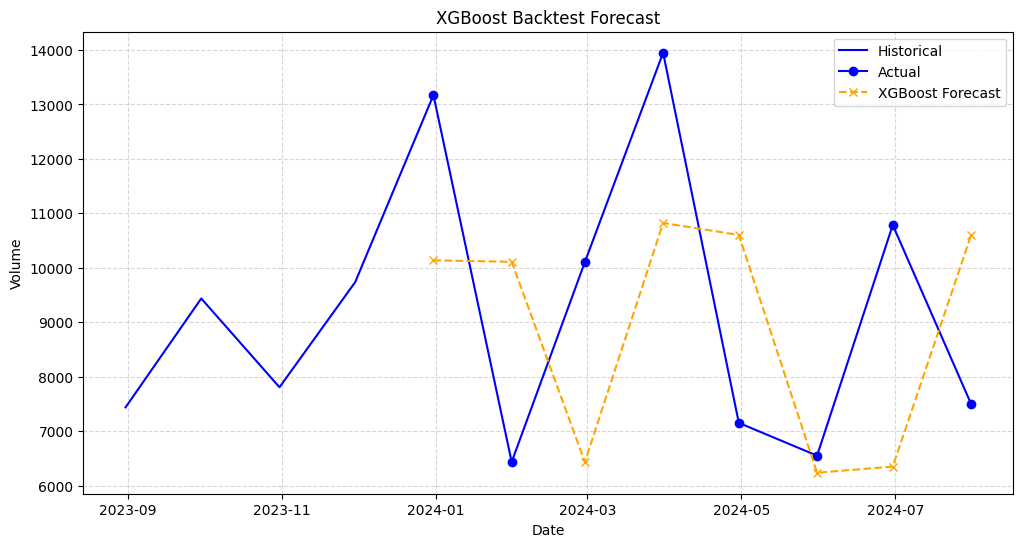

In [ ]:
xgb_forecast_cat = backtest_xgboost(cat_monthly, horizon=8)

### c. Sarima monthly

In [ ]:
# SARIMA Forecasting using Auto ARIMA
def train_and_forecast_sarima(series_monthly, horizon=8, context_months=4):
    """
    Train SARIMA model using Auto ARIMA and generate forecasts

    Parameters:
    - series_monthly: Monthly time series data
    - horizon: Number of months to forecast (default 8)
    - context_months: Number of previous months to show for context (default 4)
    """
    from pmdarima import auto_arima

    # Ensure monthly frequency
    series_monthly = series_monthly.asfreq("M")

    # Split data: last 8 months for testing, rest for training
    train_series = series_monthly.iloc[:-horizon]
    test_series = series_monthly.iloc[-horizon:]

    print(f"Training data: {len(train_series)} months")
    print(f"Test data: {len(test_series)} months")
    print(f"Training period: {train_series.index[0]} to {train_series.index[-1]}")
    print(f"Test period: {test_series.index[0]} to {test_series.index[-1]}")

    # Train Auto ARIMA model
    print("\nTraining Auto ARIMA model...")
    sarima_model = auto_arima(
        train_series,
        seasonal=True,
        m=12,  # Monthly seasonality
        max_p=3, max_d=2, max_q=3,
        max_P=2, max_D=1, max_Q=2,
        stepwise=True,
        suppress_warnings=True,
        error_action='ignore',
        trace=True
    )

    print(f"\nSelected SARIMA model order: {sarima_model.order}")
    print(f"Selected seasonal order: {sarima_model.seasonal_order}")
    print(f"AIC: {sarima_model.aic():.2f}")

    # Generate forecasts
    print(f"\nGenerating {horizon}-month forecast...")
    sarima_forecast_vals, sarima_conf_int = sarima_model.predict(n_periods=horizon, return_conf_int=True)
    sarima_forecast = pd.Series(sarima_forecast_vals, index=test_series.index)

    # Ensure non-negative forecasts
    sarima_forecast = sarima_forecast.clip(lower=0)

    # Calculate metrics
    sarima_mae = mae(test_series.values, sarima_forecast.values)
    sarima_mape = mape(test_series.values, sarima_forecast.values)

    print(f"\nSARIMA Performance:")
    print(f"MAE: {sarima_mae:.2f}")
    print(f"MAPE: {sarima_mape:.2f}%")

    # Plot results
    plot_sarima_results(series_monthly, sarima_forecast, test_series,
                       horizon=horizon, context_months=context_months)

    return sarima_model, sarima_forecast, sarima_mae, sarima_mape

In [ ]:
def plot_sarima_results(full_series, forecast, actual_test, horizon=8, context_months=4):
    plt.figure(figsize=(12, 6))

    # Focus on last `horizon` months + `context_months` for context
    start_idx = max(0, len(full_series) - horizon - context_months)
    series_zoom = full_series.iloc[start_idx:]

    # Historical data: include the last point before test period
    train_context = series_zoom.iloc[:-horizon]

    # Make historical line connect to actual line
    historical_line = pd.concat([train_context, actual_test.iloc[:1]])

    # Plot historical context
    plt.plot(historical_line.index, historical_line.values,
             label='Historical (Context)', color='blue', linewidth=2, alpha=0.7)

    # Plot actual test period
    plt.plot(actual_test.index, actual_test.values,
             label='Actual (Test Period)', marker='o', linewidth=2, color='blue')

    # Plot SARIMA forecast
    plt.plot(forecast.index, forecast.values,
             label='SARIMA Forecast', linestyle='--', marker='x',
             linewidth=2, color='red')

    plt.title(f"SARIMA Forecast - Last {horizon} Months Comparison")
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

SARIMA Forecasting - 'The Very Hungry Caterpillar'
Training data: 143 months
Test data: 8 months
Training period: 2012-01-31 00:00:00 to 2023-11-30 00:00:00
Test period: 2023-12-31 00:00:00 to 2024-07-31 00:00:00

Training Auto ARIMA model...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.14 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2649.409, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2597.383, Time=0.73 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2590.836, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2647.468, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2597.191, Time=0.17 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2583.802, Time=1.06 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=2566.320, Time=2.16 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=2576.961, Time=2.76 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2566.430, T

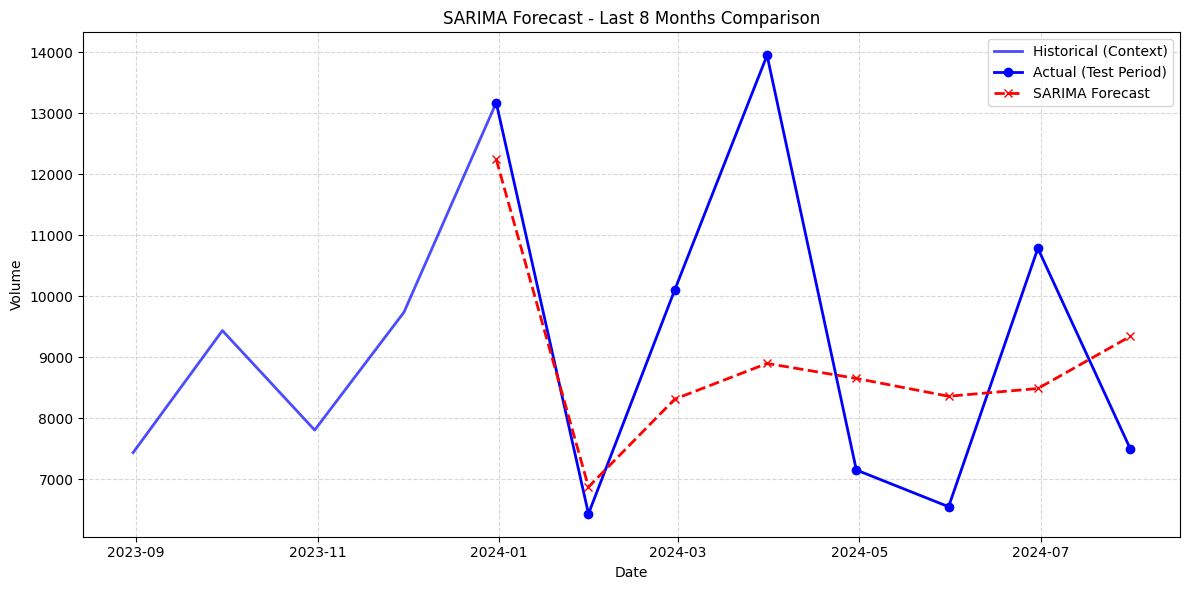

In [ ]:
# Run SARIMA for Caterpillar
print("="*60)
print("SARIMA Forecasting - 'The Very Hungry Caterpillar'")
print("="*60)
cat_model, cat_forecast, cat_mae, cat_mape = train_and_forecast_sarima(cat_monthly, horizon=8)


SARIMA Forecasting - 'The Alchemist'
Training data: 143 months
Test data: 8 months
Training period: 2012-01-31 00:00:00 to 2023-11-30 00:00:00
Test period: 2023-12-31 00:00:00 to 2024-07-31 00:00:00

Training Auto ARIMA model...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2352.814, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2321.034, Time=0.26 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2312.014, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2638.083, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=2342.425, Time=0.05 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=2312.258, Time=0.49 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=2301.591, Time=0.72 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=2302.842, Time=3.45 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=2325.519, Time=0.87 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=2293.794, Time=0.94

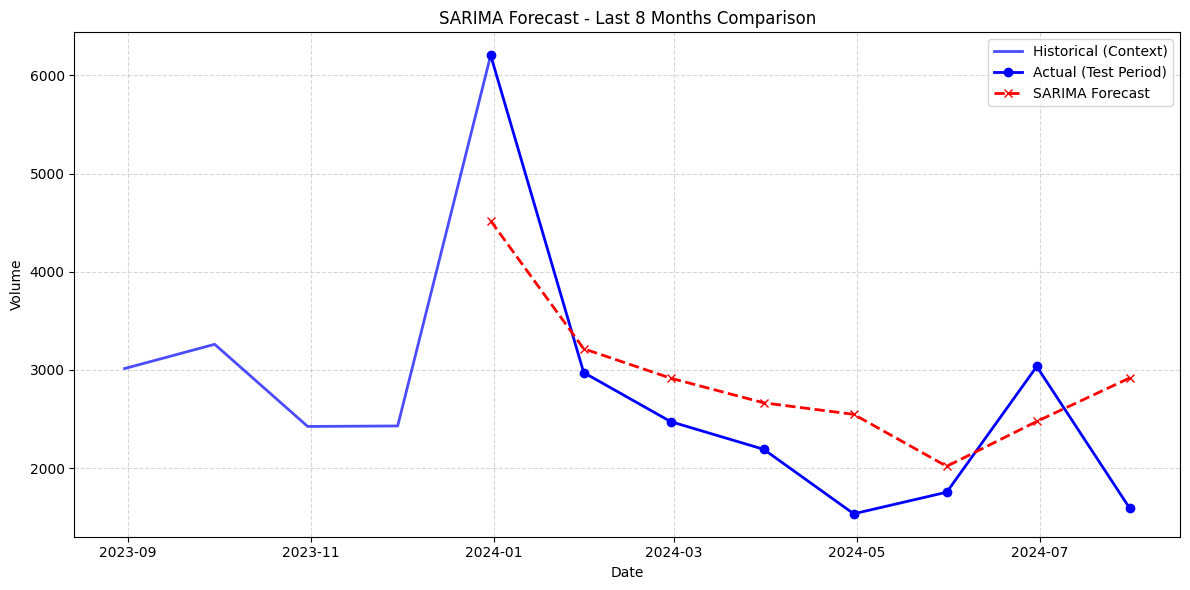

In [ ]:
# Run for Alchemist
print("\n" + "="*60)
print("SARIMA Forecasting - 'The Alchemist'")
print("="*60)
alch_model, alch_forecast, alch_mae, alch_mape = train_and_forecast_sarima(alch_monthly, horizon=8)

### d. Comparison with weekly data

Monthly:
- Caterpillar:
  - SARIMA(0,1,2)(2,0,1)[12], MAE = 1,956.89, MAPE = 20.28%
  - XGBoost: MAE: 3099.20, MAPE: 34.27%

- Alchemist:
 - SARIMA(1,0,1)(0,0,2)[12], MAE = 751.36, MAPE = 32.24%
 - XGBoost: MAE: 1068.79, MAPE: 40.21%

- Weekly XGBoost: Caterpillar MAE = 546.93, MAPE = 28.27%; Alchemist MAE = 264.51, MAPE = 47.63%

- Weekly LSTM: Caterpillar MAE = 581.67, MAPE = 25.98%; Alchemist MAE = 332.13, MAPE = 62.75%

- Weekly Hybrid Sequential: Caterpillar MAE = 688.75, MAPE = 39.40%; Alchemist MAE = 282.63, MAPE = 49.34%

- Weekly Hybrid Parallel: Caterpillar MAE = 687.68, MAPE = 39.46% (SARIMA weight = 1.0); Alchemist MAE = 279.43, MAPE = 49.14% (SARIMA weight = 0.9)

Monthly aggregation confirms trends observed weekly but smooths out volatility, slightly improving SARIMA performance compared to weekly ML models.

For XGBoost we have higher MAEs, expected as monthly can amplify variablity in sales.  Relative errors (MAPE) remain comparable to weekly forecasts.